## Import libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

# libraries for upsampling and down sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## read data

In [151]:
data_original = pd.read_csv('BankChurners.csv')

In [152]:
# make a copy of data
data = data_original.copy()

## get first and last 5 rows

In [4]:
#first 5 rows
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [5]:
# last 5 rows
data.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[5 rows x 21 columns]

## check shape , info 

In [6]:
# shape
data.shape

(10127, 21)

In [7]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Observation :
- There are 10127 rows and 20 columns. 
- 50% of the columns are of data types integers followed by Object(6) types and float(5).
- Also CLIENTNUM column is not much helpful in prediction so droping off this column.

In [153]:
# drop column CLIENTNUM
data.drop(['CLIENTNUM'],axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Data Clean up

In [154]:
# check any missing values
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
# check individual unique values in each column
for col in data.columns:
    print('value counts for the column {}\n'.format(col),data[col].value_counts(dropna=False))
    print('*'* 40)

value counts for the column Attrition_Flag
 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
****************************************
value counts for the column Customer_Age
 44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64
****************************************
value counts for the column Gender
 F    5358
M    4769
Name: Gender, dtype: int64
****************************************
value counts for the column Dependent_count
 3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int

- Columns "Education_Level", "Marital_Status", "Income_Category" has unknown values

In [155]:
# map the target attrition flag to 0 and 1
Attrition_Flag = {'Existing Customer':0,'Attrited Customer': 1}
data['Attrition_Flag']=data.Attrition_Flag.map(Attrition_Flag).astype(int)

In [156]:
# convert all the object types to category
data.select_dtypes(include=['object']).columns
for col in data.select_dtypes(include=['object']).columns:
    data[col]=data[col].astype('category')

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

## Summary of the dataset

In [14]:
data.describe().T

count         mean          std     min       25%  \
Attrition_Flag            10127.0     0.160660     0.367235     0.0     0.000   
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Attrition_Flag               0.000      0.000      1.000  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

#### observation:
- Average customer age is 46
- Average Months_on_book is 35 and maximum is 56
- 75% of the customers are inactive for 3 months in last 12 months
- 75% of the customers are contacted at least 3 times in last 12 months
- 75% of the customers avg_utilization_ratio is ~0.5

### EDA

### Univariate Analysis

In [15]:
# common functions for percentage Bar plots / box plot / histogram / outler treatment

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.15 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
def treat_outliers(df,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=(Q3-Q1)
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df




#### Observation on Attrition_Flag

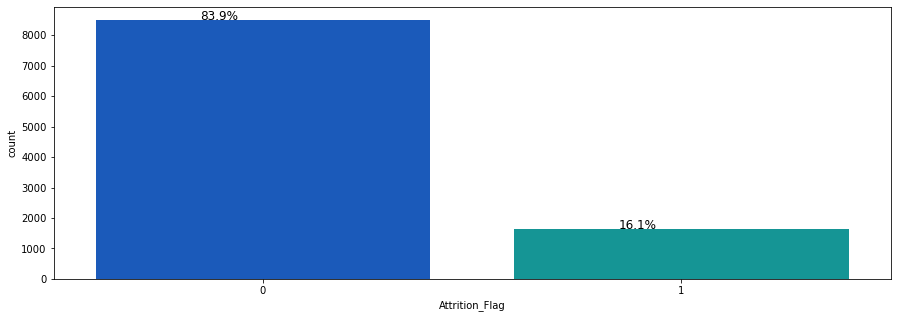

In [16]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Attrition_Flag,palette='winter')
perc_on_bar(ax, data.Attrition_Flag)
# histogram_boxplot(data.Attrition_Flag)

- Attrited Customers are 16%

#### Observation on Customer_Age

<Figure size 1080x360 with 0 Axes>

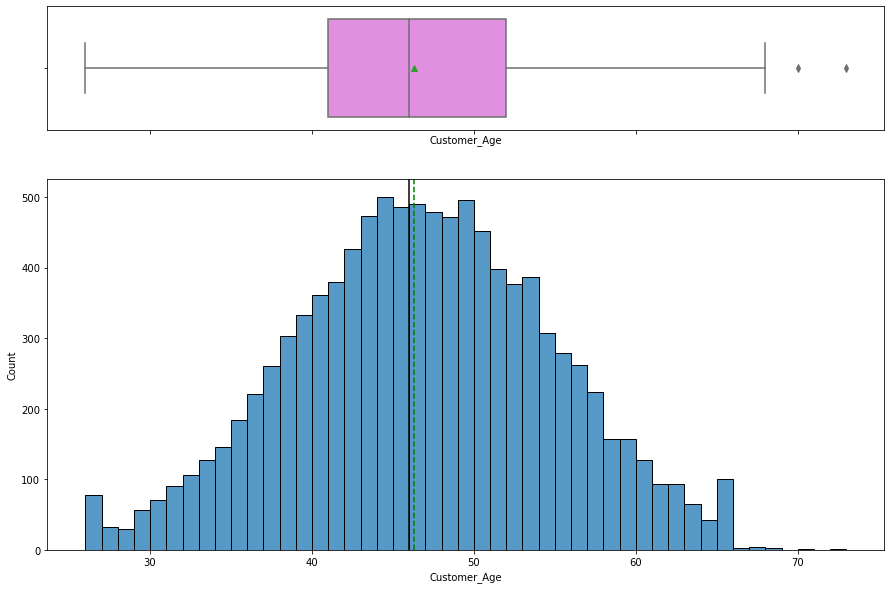

In [17]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Customer_Age)

- There are couple of outliers where age is greater than 70
- Mean and median of the age is almost close to 46

#### Observation on Gender

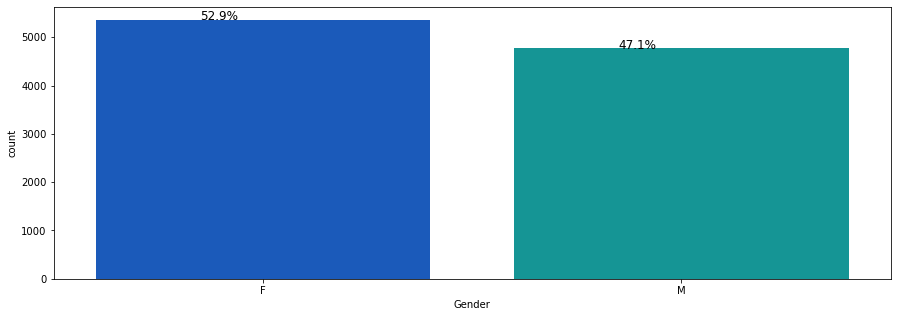

In [18]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Gender,palette='winter')
perc_on_bar(ax, data.Gender)

- Female customers are little higher than Male customers

#### Observation on Dependent_count

<Figure size 1080x360 with 0 Axes>

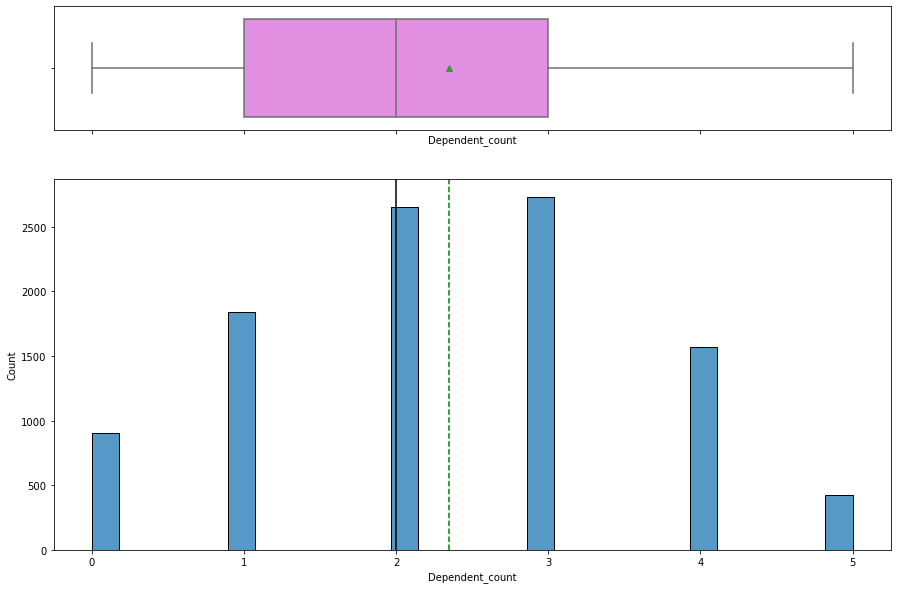

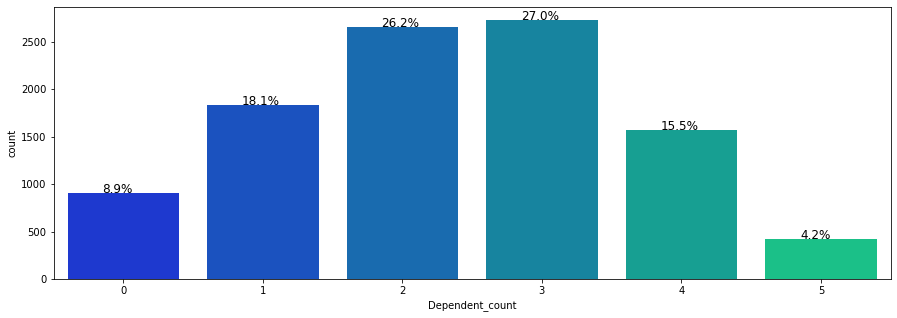

In [19]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Dependent_count)
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Dependent_count,palette='winter')
perc_on_bar(ax, data.Dependent_count)

- Customers with dependent count 2 & 3 are more. 

#### Observation on Education_Level

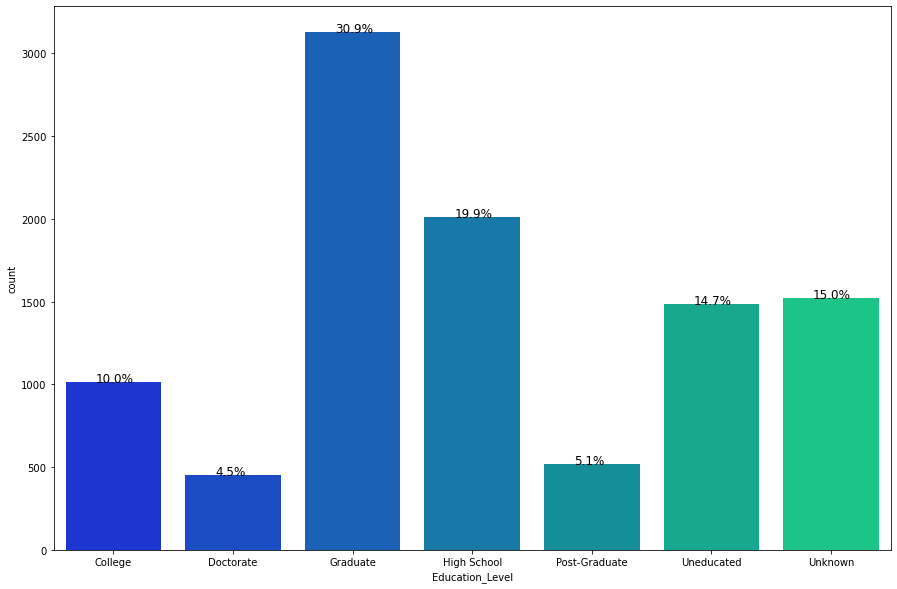

In [20]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data.Education_Level,palette='winter')
perc_on_bar(ax, data.Education_Level)

- Graduate customers are more(30.9%) and HighSchool customers followed(19.9%) 
- There are unknown catagory we will treat them using KNN impuuter

#### Observation on Marital_Status

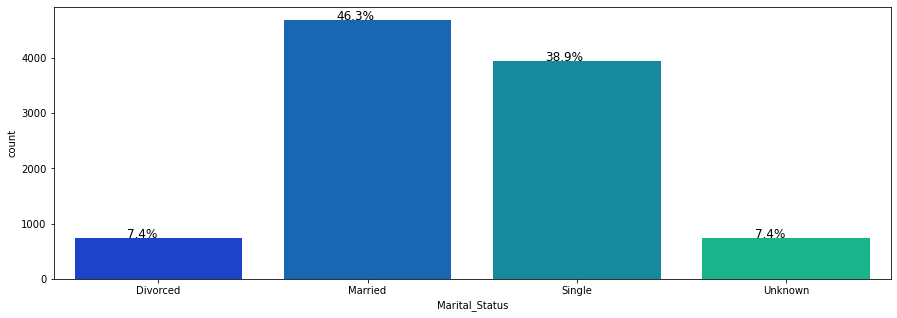

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Marital_Status,palette='winter')
perc_on_bar(ax, data.Marital_Status)

- Married and Single customers are more and divorced are very less.
- There are unknown catagory we will treat them using KNN imputer

#### Observation on Income_Category

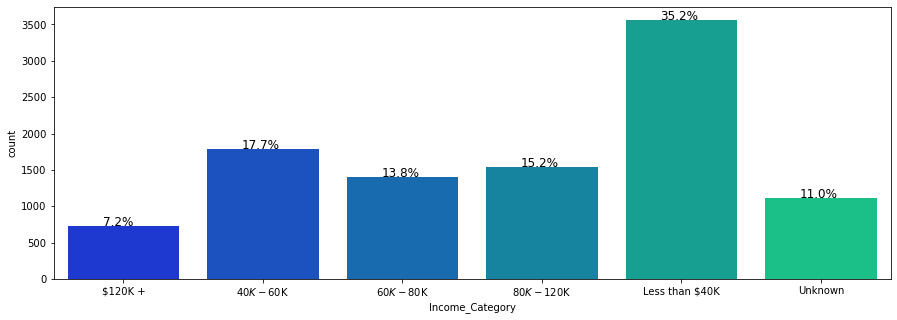

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Income_Category,palette='winter')
perc_on_bar(ax, data.Income_Category)

- ~35% of the customers are having income less than 40k followed by 40k- 60k category 
- 7.2% of the people are having more than 120K + income
- There are unknown category we will treat them using KNN imputer.

#### Observation on Card_Category

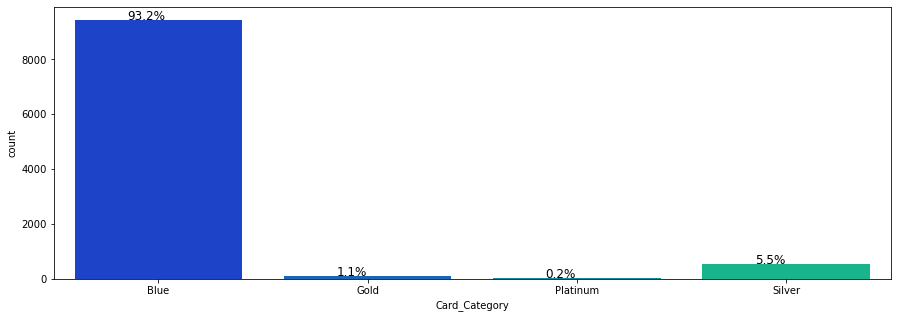

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Card_Category,palette='winter')
perc_on_bar(ax, data.Card_Category)

- Blue card catogory customers are high number(~93%)

#### Observation on Months_on_book

<Figure size 1080x360 with 0 Axes>

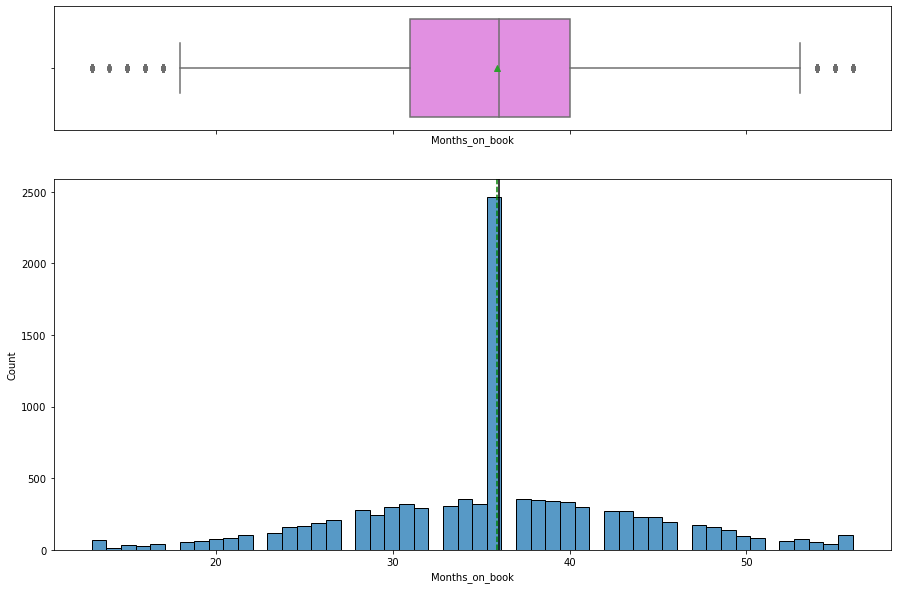

In [24]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Months_on_book)

- There are some out liers. We migh need to treat them for outliers.

In [25]:
# out lier treatment for the feature Months_on_book
data = treat_outliers(data, 'Months_on_book' )

<Figure size 1080x360 with 0 Axes>

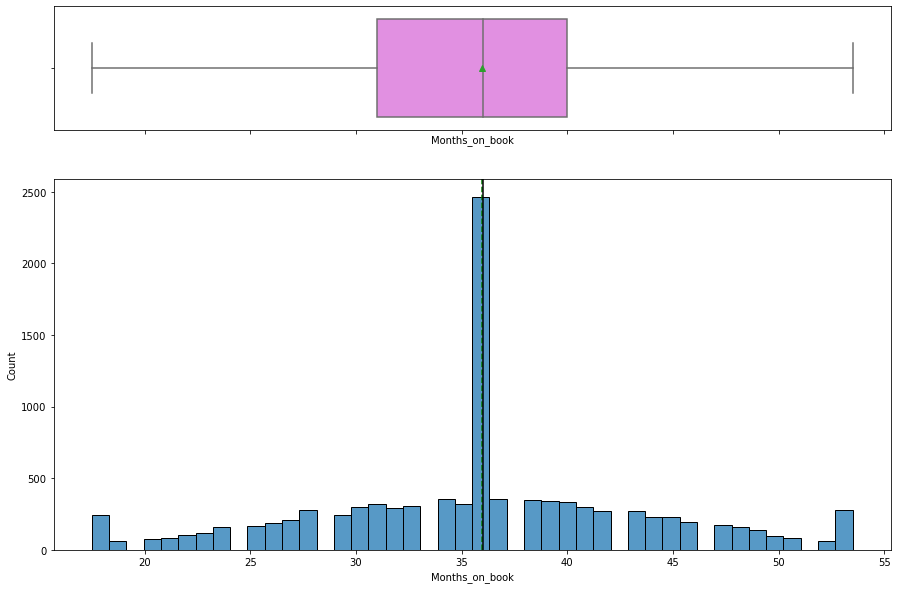

In [26]:
# plot after out lier treatment
plt.figure(figsize=(15,5))
histogram_boxplot(data.Months_on_book)

- average and median of the feature Months_on_book is almost same (~36)

#### Observation on Total_Relationship_Count

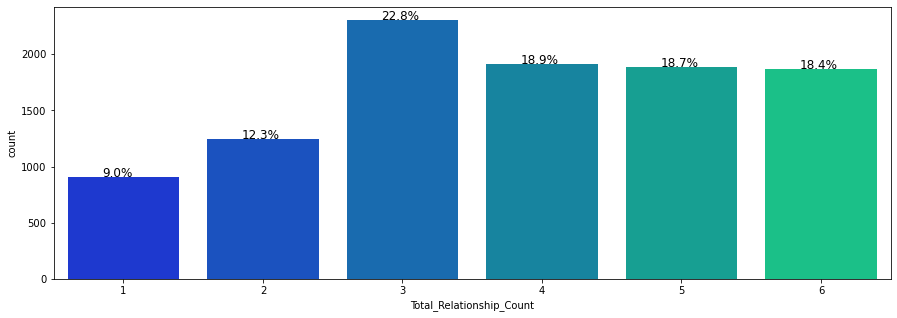

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Total_Relationship_Count,palette='winter')
perc_on_bar(ax, data.Total_Relationship_Count)

- Customers with products 3 are higher(22.8%) followed by the customers with products held(4, 5 & 6)

#### Observation on Months_Inactive_12_mon

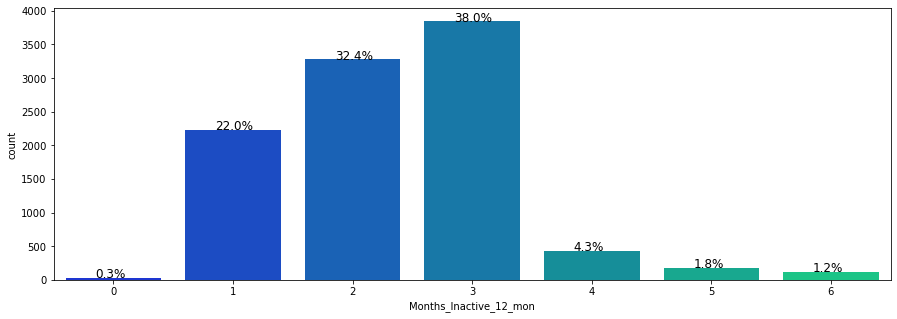

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Months_Inactive_12_mon,palette='winter')
perc_on_bar(ax, data.Months_Inactive_12_mon)

- Most of the customers with inactive are for 3 months

#### Observation on Contacts_Count_12_mon

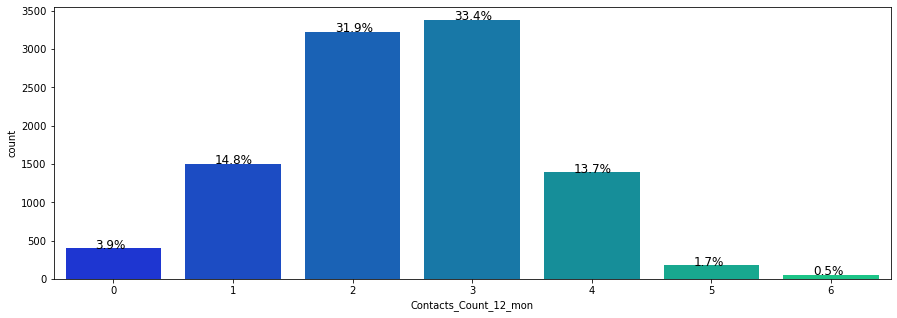

<Figure size 1080x360 with 0 Axes>

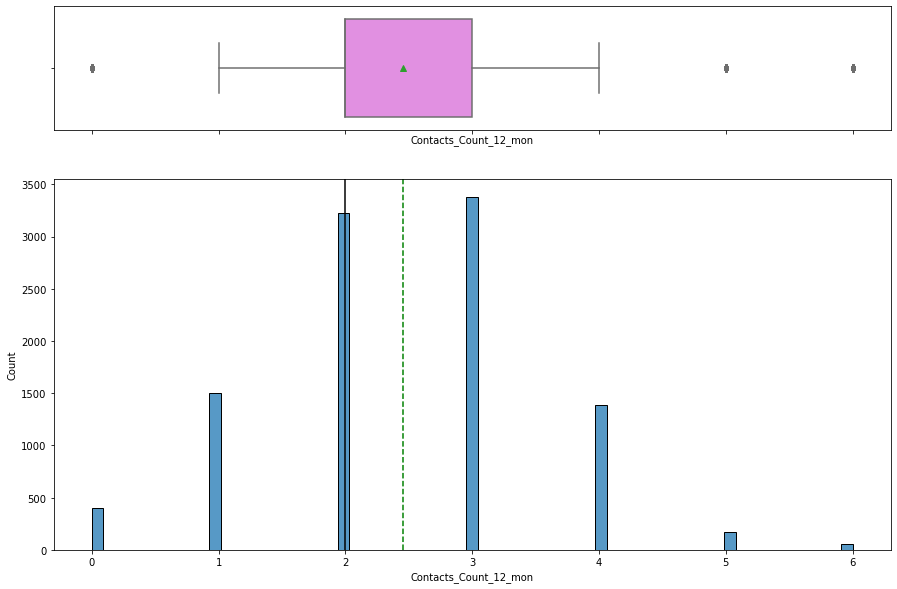

In [29]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data.Contacts_Count_12_mon,palette='winter')
perc_on_bar(ax, data.Contacts_Count_12_mon)
plt.figure(figsize=(15,5))
histogram_boxplot(data.Contacts_Count_12_mon)

- There are very few outliers. We might need out lier treatment. but would like to continue with out outlier treatment since these are just 3.
- On an average ~2 times customers were contacted.

#### Observation on Credit_Limit

<Figure size 1080x360 with 0 Axes>

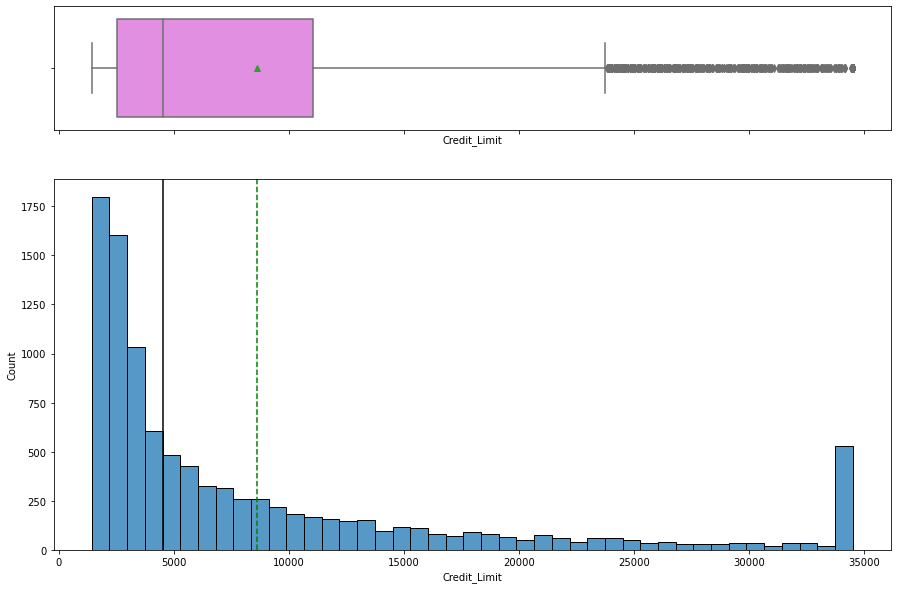

In [30]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Credit_Limit)

- Credit limit is right skewed and it has lot of out liers. Outlier treatment is needed.


In [31]:
# out lier treatment on Credit_Limit
data = treat_outliers(data, 'Credit_Limit')

<Figure size 1080x360 with 0 Axes>

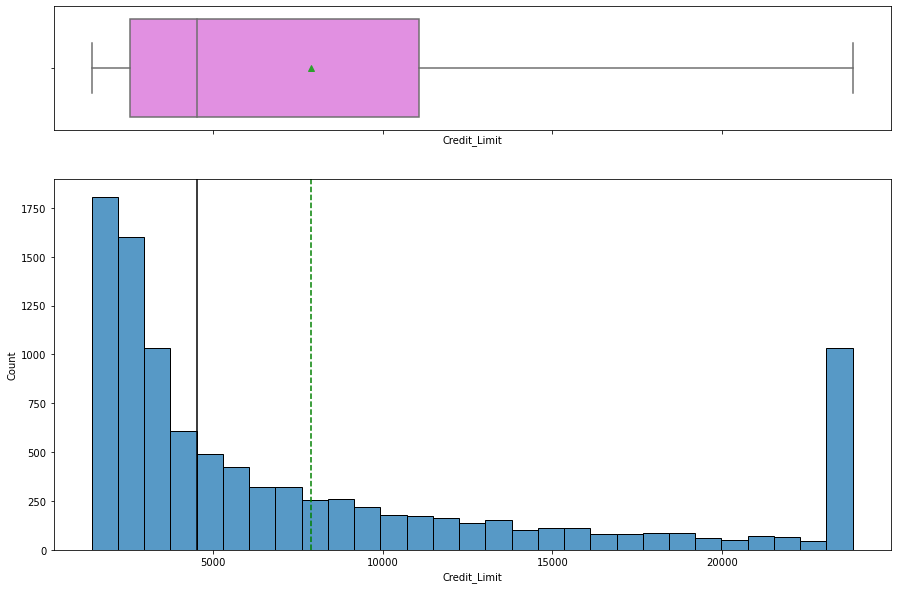

In [32]:
#plot after out lier treatment
plt.figure(figsize=(15,5))
histogram_boxplot(data.Credit_Limit)

#### Observation on Total_Revolving_Bal

<Figure size 1080x360 with 0 Axes>

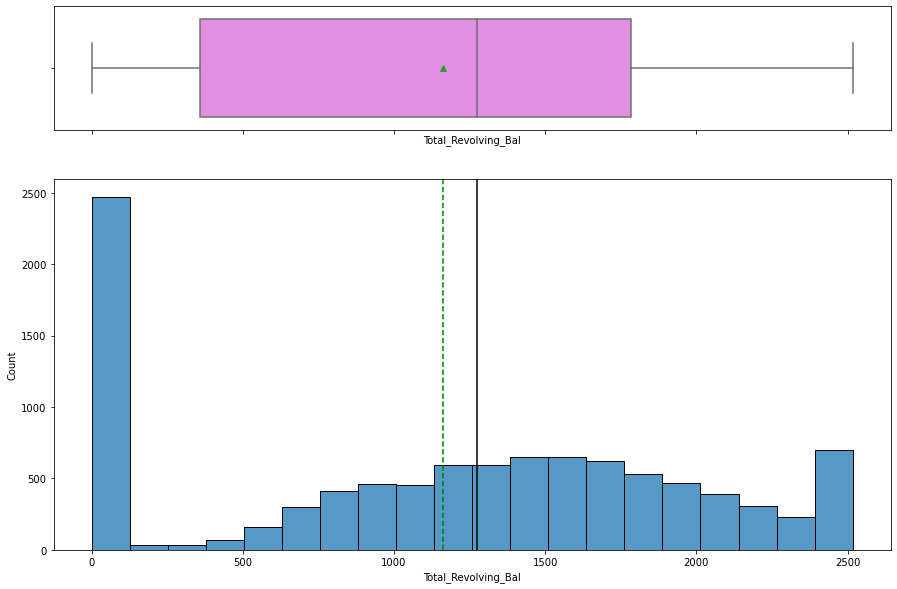

In [33]:

plt.figure(figsize=(15,5))
histogram_boxplot(data.Total_Revolving_Bal)

- Total Revolving balance has mean ~1200 and meadian around 1300.

#### Observation on Avg_Open_To_Buy

<Figure size 1080x360 with 0 Axes>

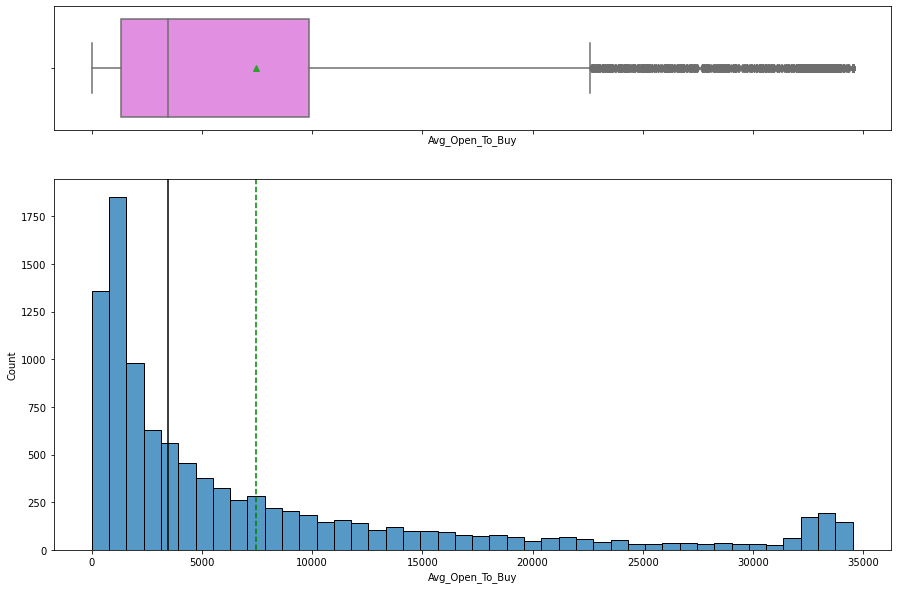

In [34]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Avg_Open_To_Buy)

- Avg_Open_To_Buy has lot of out liers. Outlier treatment is needed.

In [35]:
# out lier treatment for Avg_Open_To_Buy
data = treat_outliers(data,'Avg_Open_To_Buy')

<Figure size 1080x360 with 0 Axes>

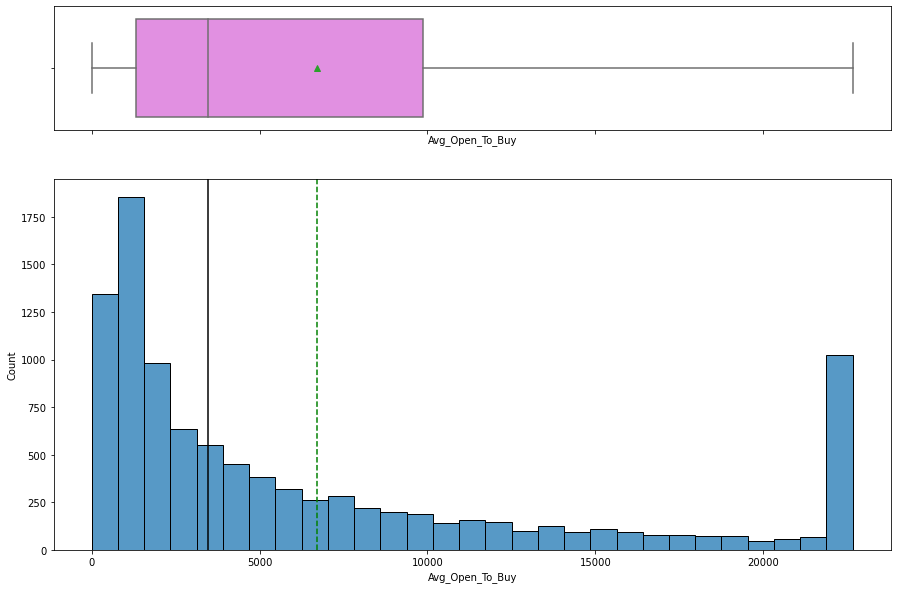

In [36]:
# plot after outlier treatment
plt.figure(figsize=(15,5))
histogram_boxplot(data.Avg_Open_To_Buy)

- Average amount left on the credit for all the customers is ~6000 

#### Observation on Total_Amt_Chng_Q4_Q1

<Figure size 1080x360 with 0 Axes>

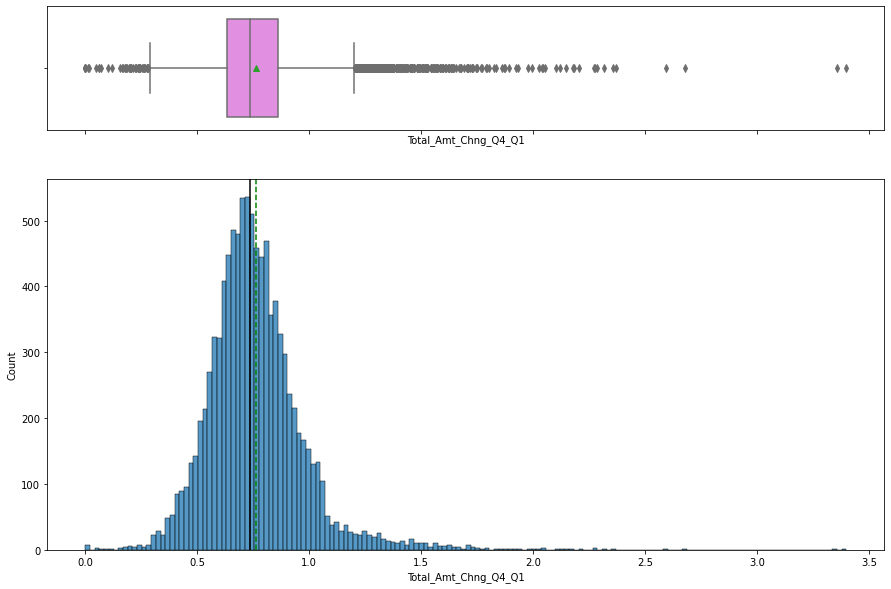

In [37]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Total_Amt_Chng_Q4_Q1)

- outlier treatment is needed. 

In [38]:
data = treat_outliers(data,'Total_Amt_Chng_Q4_Q1')

<Figure size 1080x360 with 0 Axes>

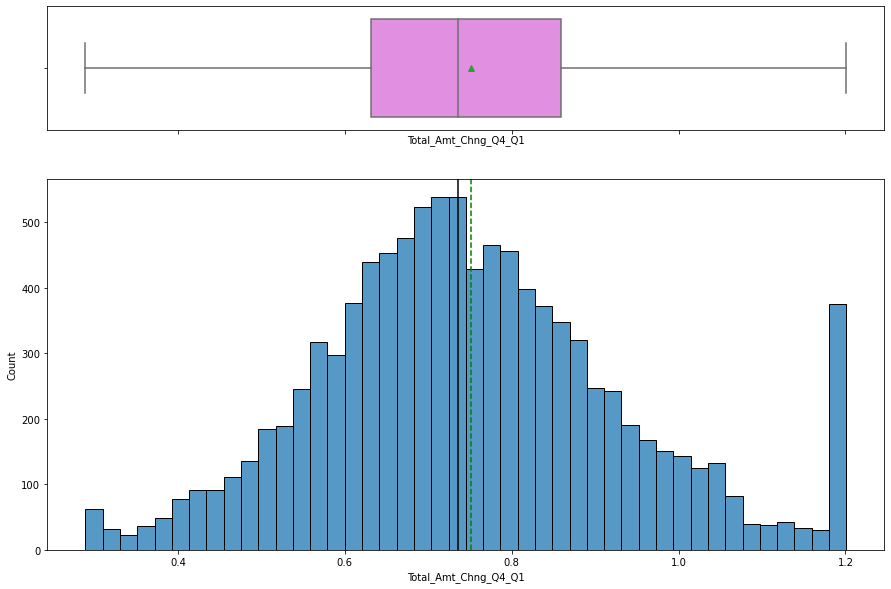

In [39]:
# plot after outlier treatment.
plt.figure(figsize=(15,5))
histogram_boxplot(data.Total_Amt_Chng_Q4_Q1)

- mean and median are almost close(~0.75)

#### Observation on Total_Trans_Amt

<Figure size 1080x360 with 0 Axes>

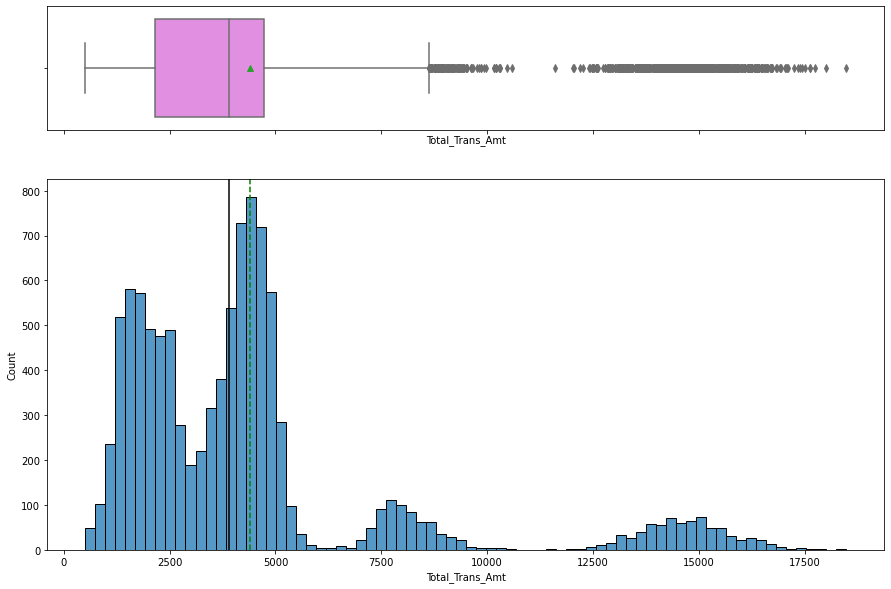

In [40]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Total_Trans_Amt)

- Its right skewed and many outliers. needed to perform outlier treatment.

In [41]:
data = treat_outliers(data, 'Total_Trans_Amt')

<Figure size 1080x360 with 0 Axes>

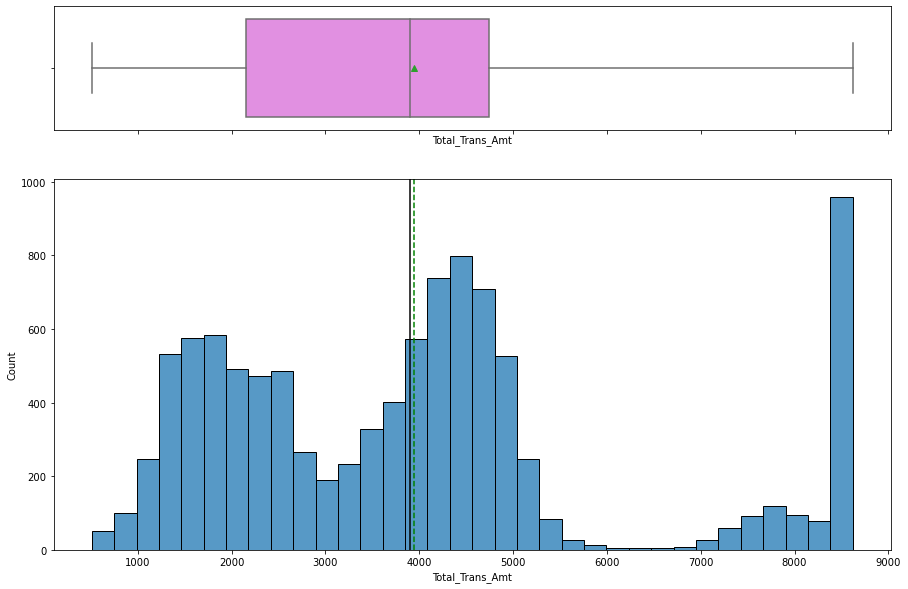

In [42]:
# plots after outlier treatment
plt.figure(figsize=(15,5))
histogram_boxplot(data.Total_Trans_Amt)

- Mean and median are almost same(~3900)

#### Observation on Total_Trans_Ct

<Figure size 1080x360 with 0 Axes>

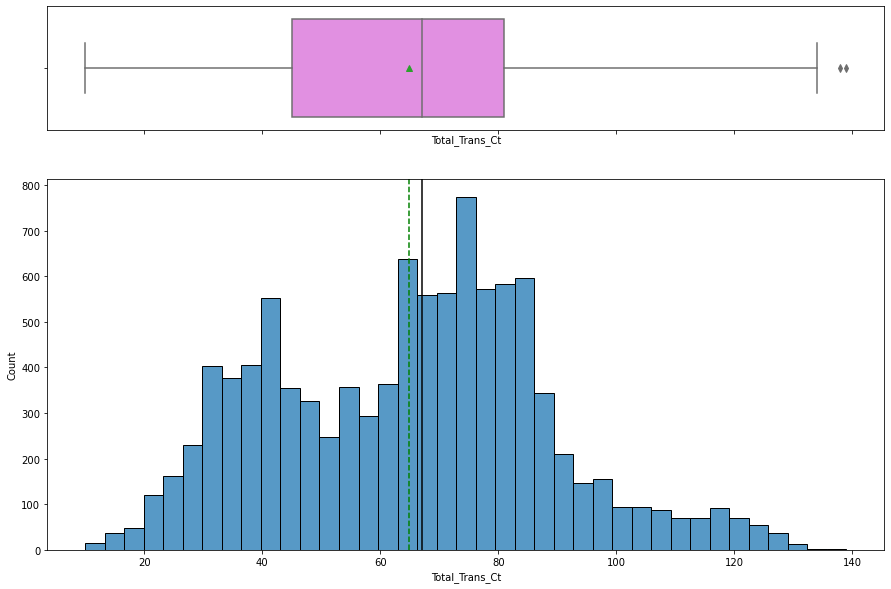

In [43]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Total_Trans_Ct)

- average Total_Trans_Ct is ~68

#### Observation on Total_Ct_Chng_Q4_Q1

<Figure size 1080x360 with 0 Axes>

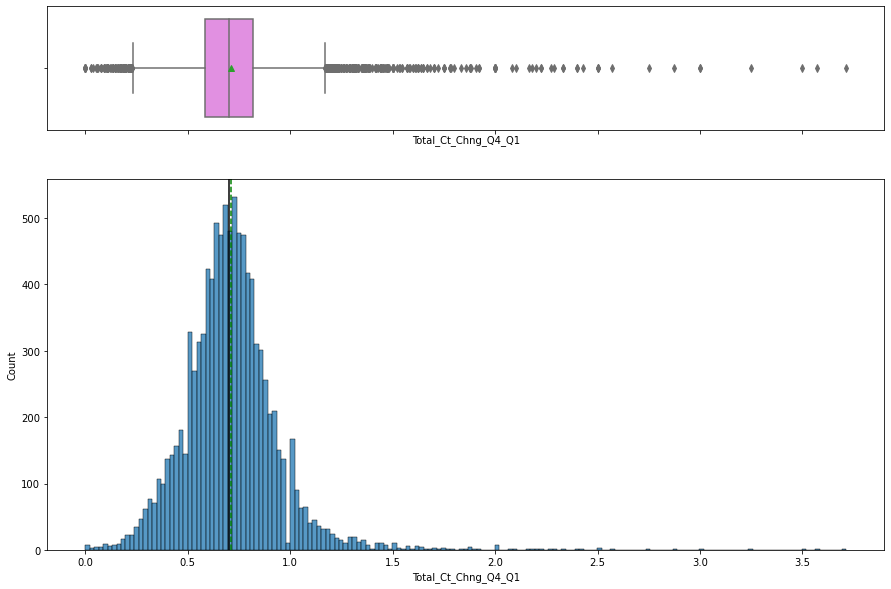

In [44]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Total_Ct_Chng_Q4_Q1)

- There are too many outliers. Need to perform outlier treatment

In [45]:
# out lier treatment on Total_Ct_Chng_Q4_Q1
data = treat_outliers(data, 'Total_Ct_Chng_Q4_Q1')

<Figure size 1080x360 with 0 Axes>

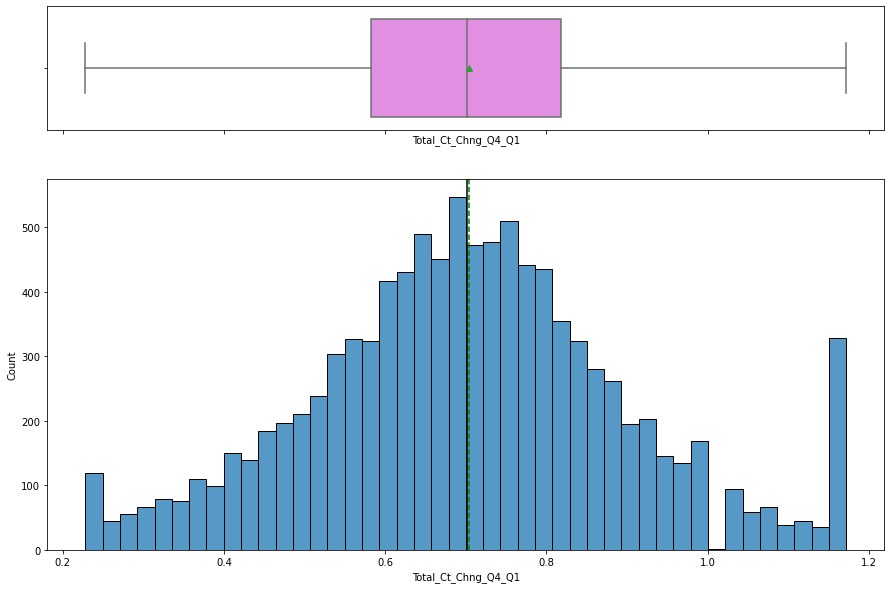

In [46]:
# plots after out lier treatment
plt.figure(figsize=(15,5))
histogram_boxplot(data.Total_Ct_Chng_Q4_Q1)

- Average and median are almost same(0.7) for Total_Ct_Chng_Q4_Q1 

#### Observation on Avg_Utilization_Ratio

<Figure size 1080x360 with 0 Axes>

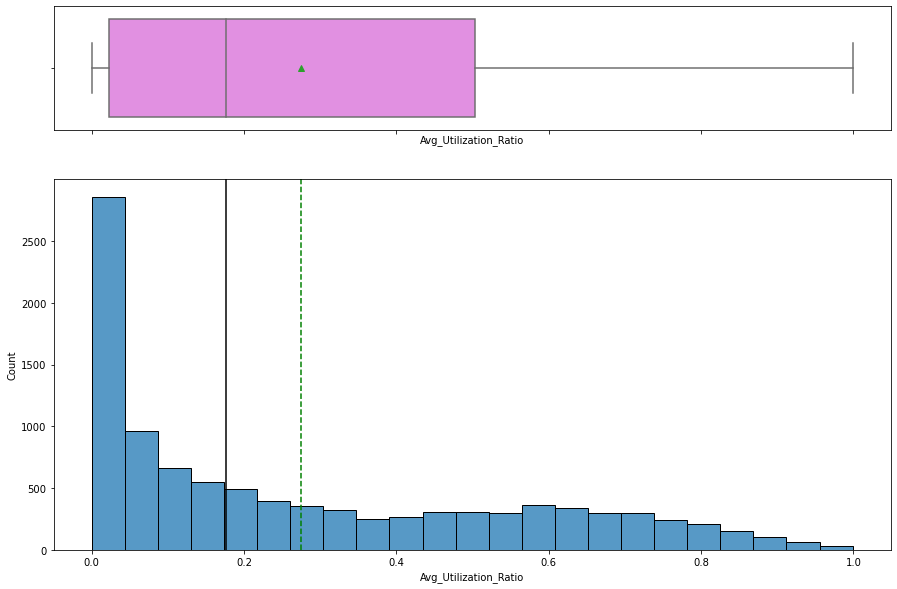

In [47]:
plt.figure(figsize=(15,5))
histogram_boxplot(data.Avg_Utilization_Ratio)

- Mean for Avg_Utilization_Ratio is ~0.2 and Median is ~0.3

### Bivariate analysis

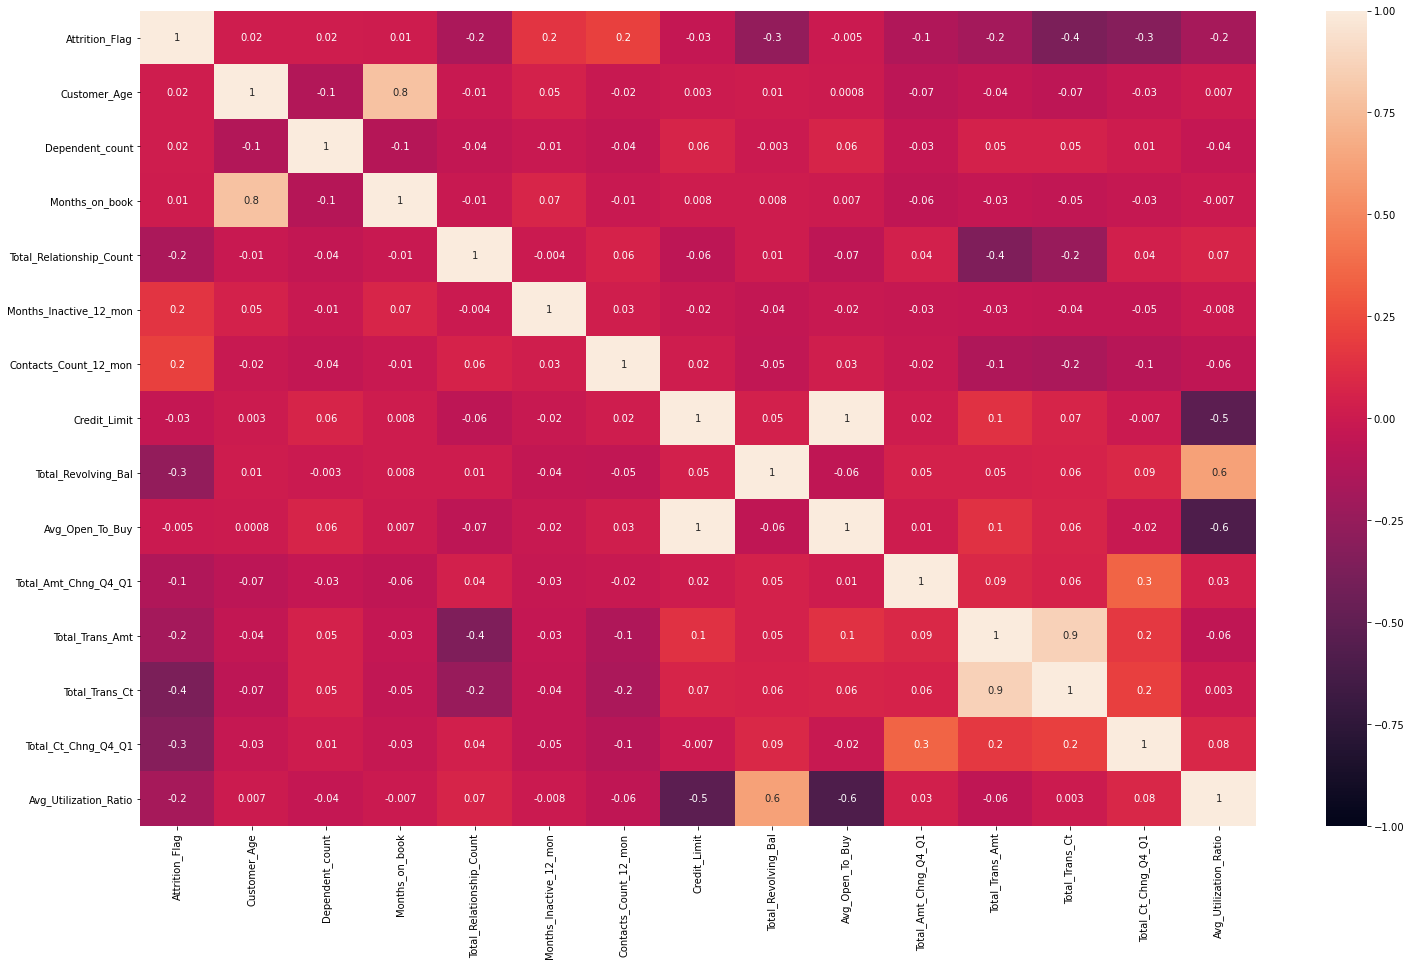

In [48]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

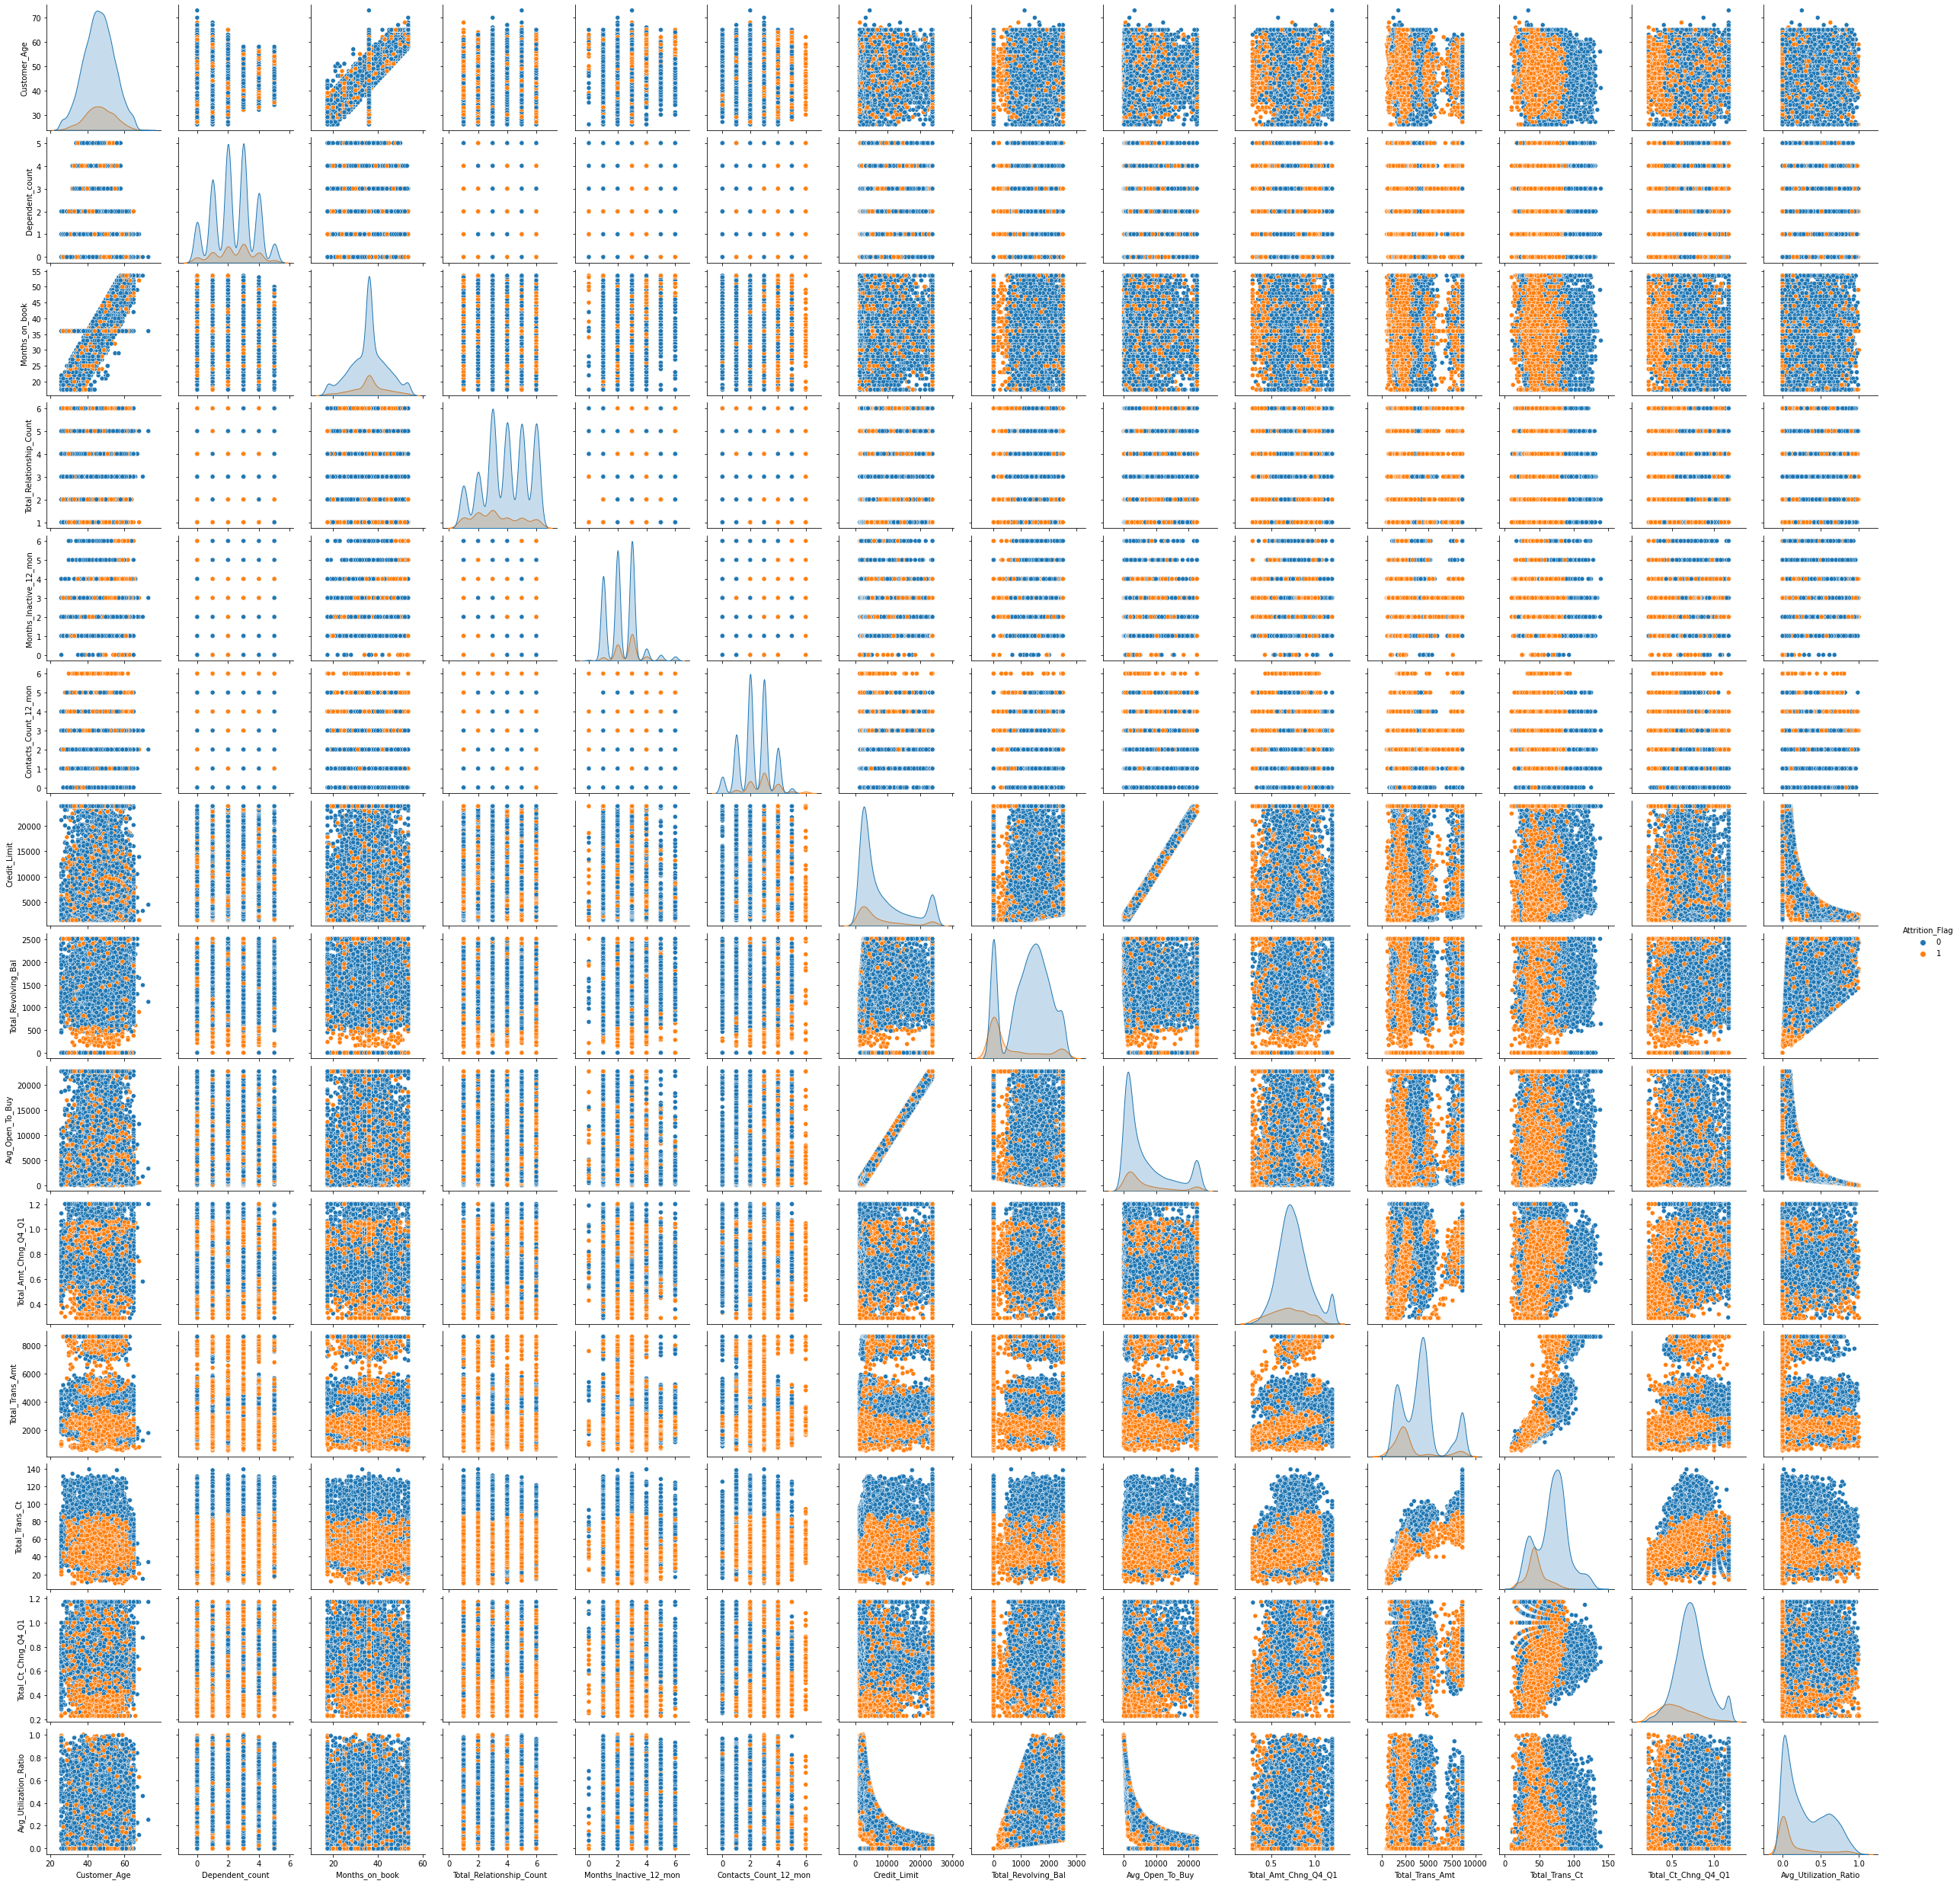

In [49]:
# draw pairplot
sns.pairplot(data,hue='Attrition_Flag')
plt.show()

- Attrition_Flag has positive correlation with features Months_Inactive_12_mon, Contacts_Count_12_mon.
  and Negetive correlation with Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct,Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio & Total_Amt_Chng_Q4_Q1.
- Total_Trans_Ct & Total_Trans_Amt are positively highly correlated(corr = 0.9). we can drop one of the columns
- Months on book and customer age are also highly positively correlated(corr = 0.8). We can drop on of the columns.
- Total_Revolving_Bal & Avg_Utilization_Ratio positively correlated
- Avg_Utilization_Ratio & Avg_Open_To_Buy are having negative correlation. 
- We need to do further analysis for better understanding.
- Avg_Open_To_Buy & Credit_Limit are highly correlated( corr = 1) . We can drop one of the columns.
- Going to drop columns Avg_Open_To_Buy, Customer_Age, Total_Trans_Amt

In [158]:
data.drop(['Avg_Open_To_Buy','Customer_Age','Total_Trans_Amt'], axis=1,inplace=True)

#### Attrition_Flag vs Months_on_book

In [133]:
### Function to plot distributions and Boxplots of enrollees
def plot(x,target='Attrition_Flag'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of exising customer')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of Attrited customer')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t target')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t target - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

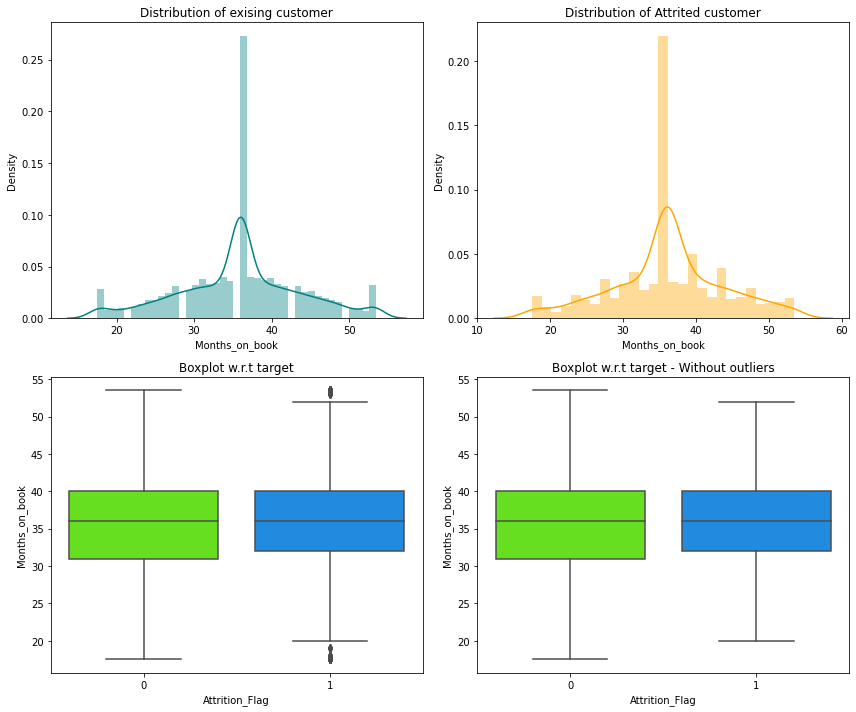

In [134]:
plot('Months_on_book')

- Months on book seems does not have much impact

#### Attrition_flag vs Total_Relationship_Count

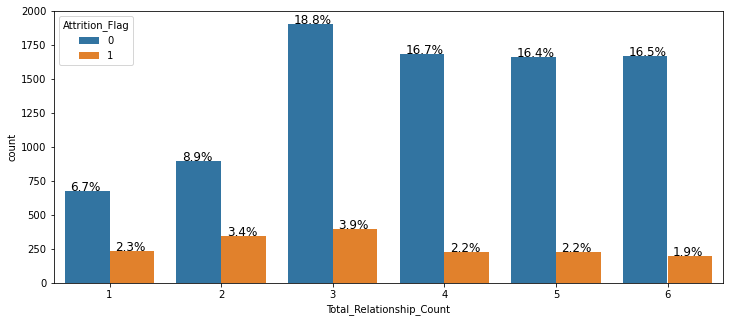

In [159]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Total_Relationship_Count'], hue = data['Attrition_Flag'])
perc_on_bar(ax,data['Total_Relationship_Count'])

- Customers with relationship counts 2 and 3 are likely more in attrition.

#### Attrition_flag vs months inactive

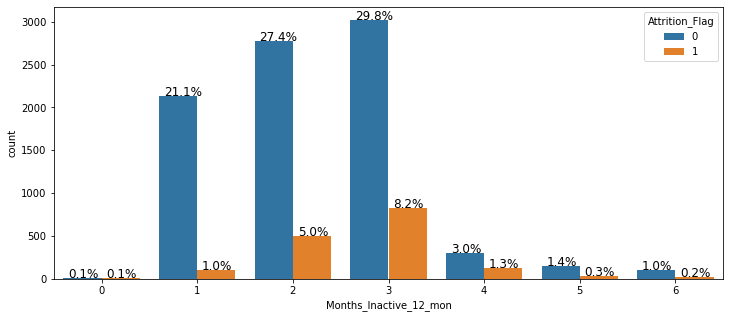

In [139]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Months_Inactive_12_mon'], hue = data['Attrition_Flag'])
perc_on_bar(ax,data['Months_Inactive_12_mon'])

- Customers who are inactive for 2 and 3 months are likely more in attrition.

#### Attrition_flag vs Contacts_Count_12_mon

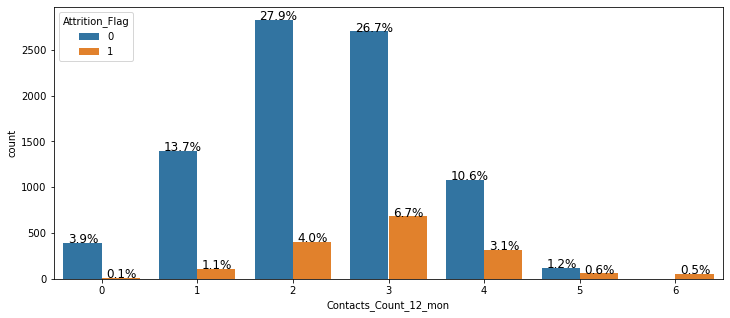

In [140]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Contacts_Count_12_mon'], hue = data['Attrition_Flag'])
perc_on_bar(ax,data['Contacts_Count_12_mon'])

- Customers who were contacted 2 to 4 times in last 12 months are likely in attrition zone.

#### Attrition_flag vs Credit Limit

<Figure size 864x360 with 0 Axes>

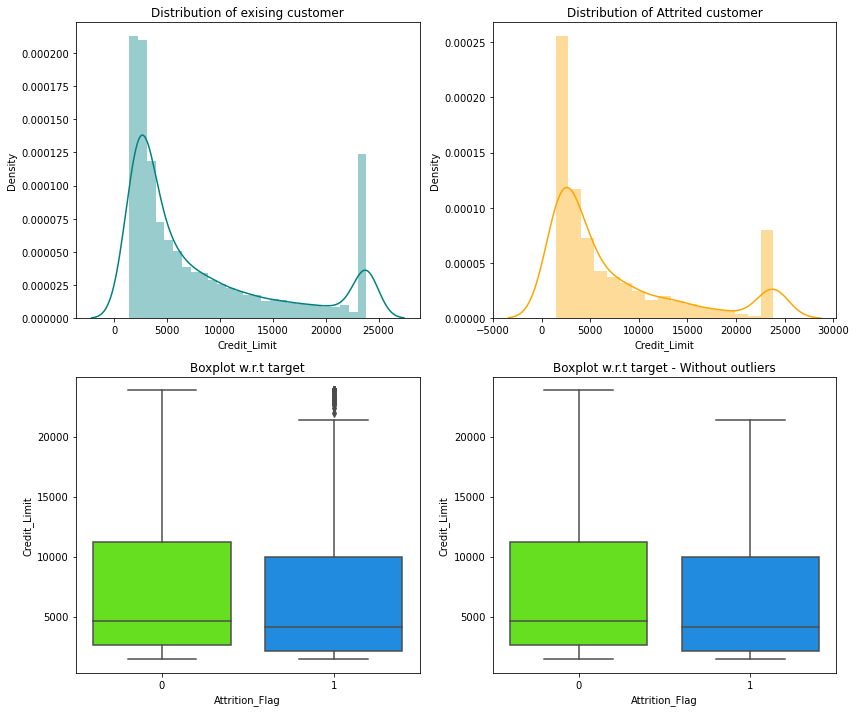

In [143]:
# plt.figure(figsize=(12,5))
# ax = sns.countplot(data['Credit_Limit'], hue = data['Attrition_Flag'])
# perc_on_bar(ax,data['Credit_Limit'])
plt.figure(figsize=(12,5))
# sns.boxplot(data['Attrition_Flag'],data['Credit_Limit'],palette="PuBu")
plot('Credit_Limit')

- Doesn't seems to have much impact on attrition flag

#### Attrition_Flag vs Total_Revolving_Bal

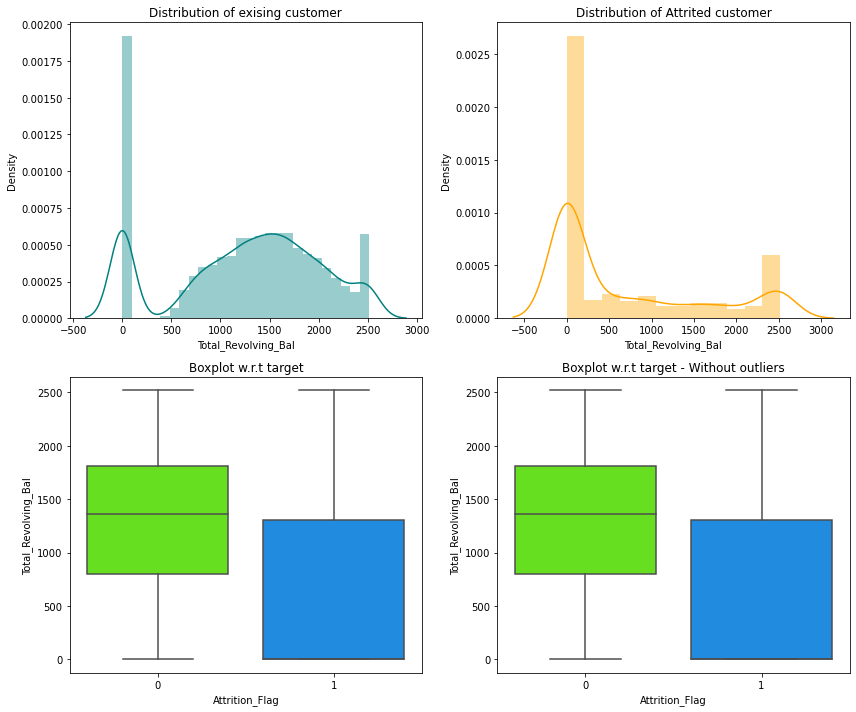

In [144]:
plot('Total_Revolving_Bal')

- customers with less revolving balance (0 to ~1200) are morelike to be in attrition zone.

#### Attrition flag  vs Total_Amt_Chng_Q4_Q1

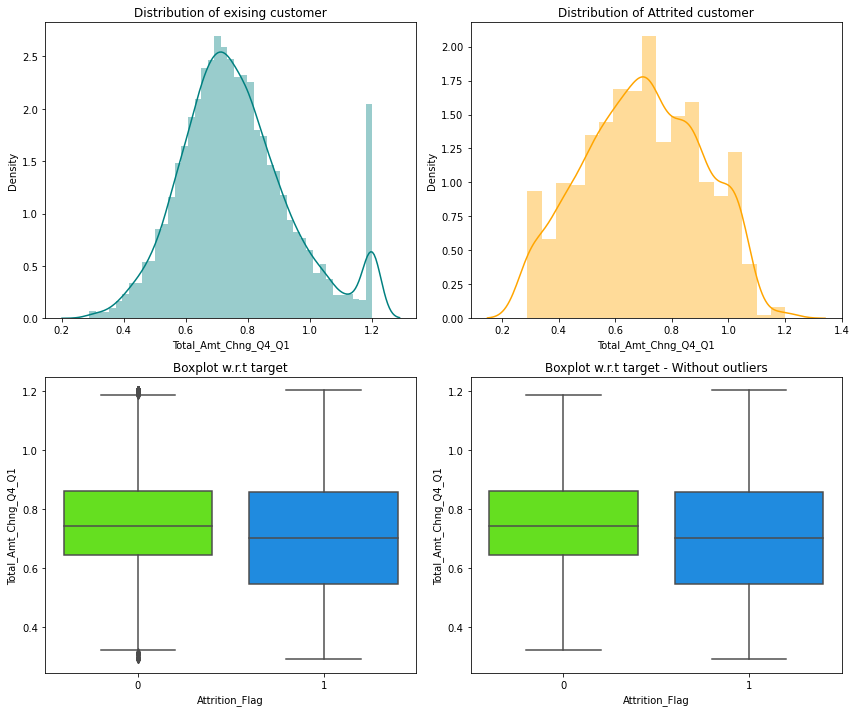

In [145]:
plot('Total_Amt_Chng_Q4_Q1')

- Seems like smaller Total amount ratio in q4 and q1 are falling in attrition zone

#### Attrition flag Vs Total_Trans_Ct

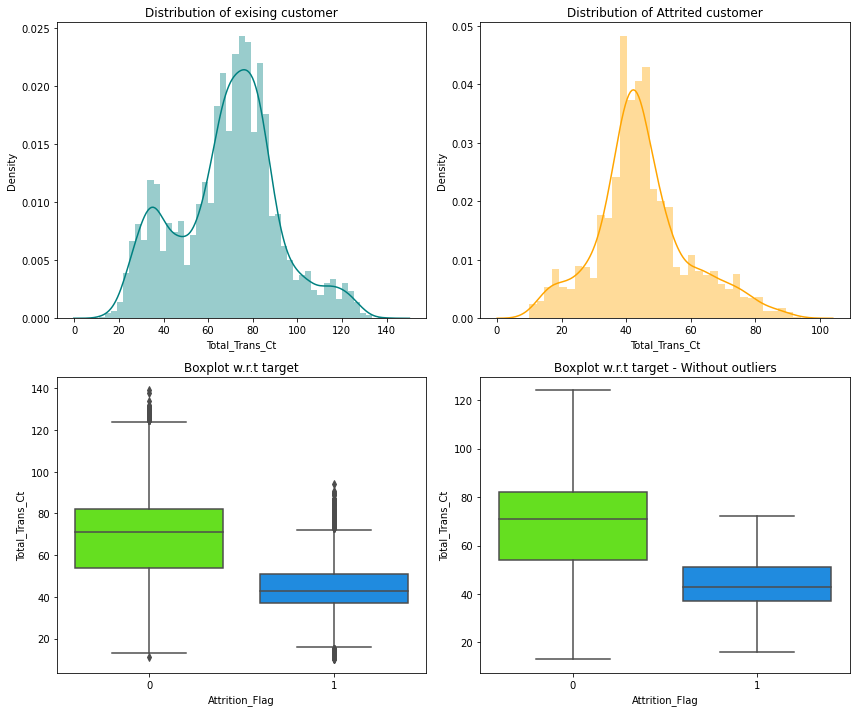

In [147]:
plot('Total_Trans_Ct')

- Seems like lesser transactional counts leads to attrition zone.

#### Attrition_flag vs Total_Ct_Chng_Q4_Q1

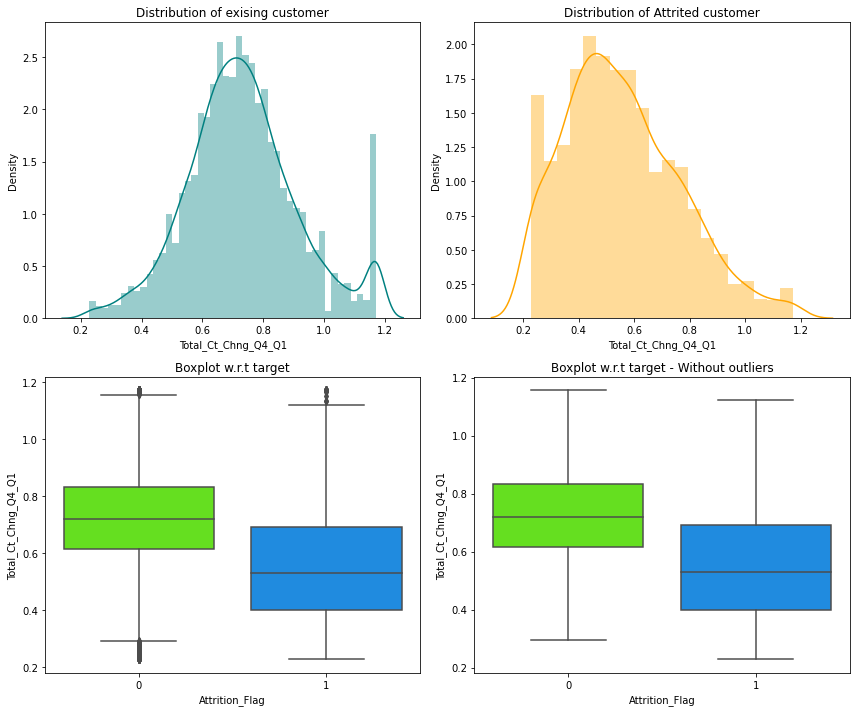

In [148]:
plot('Total_Ct_Chng_Q4_Q1')

- Total_Ct_Chng_Q4_Q1 with ratio less than 0.7 are likely to be attrited

#### Attrition flag vs Avg_Utilization_Ratio

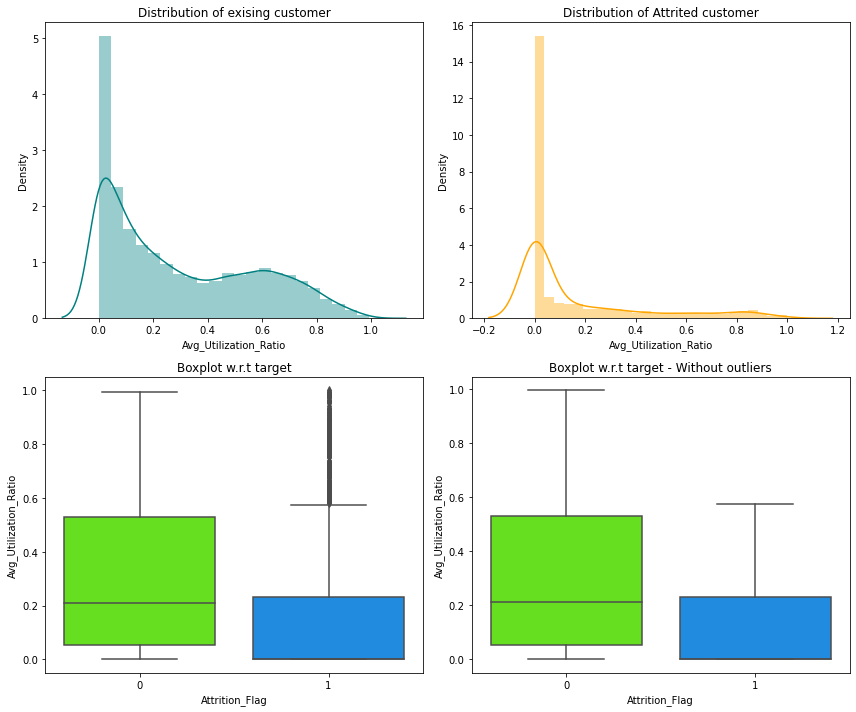

In [149]:
plot('Avg_Utilization_Ratio')

- Customers with average utilization ratio less than 0.2 are likely to be attrited.

#### Attrition flag vs Income categoty

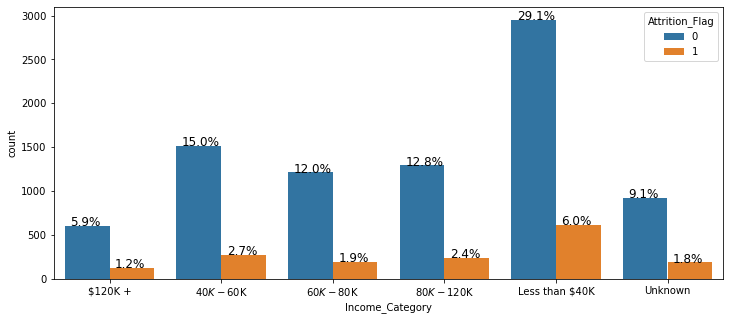

In [160]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Income_Category'], hue = data['Attrition_Flag'])
perc_on_bar(ax,data['Income_Category'])

- Customers who are in the income category "less than $40k" are likely more in attrition zone

#### Attrition flag vs Card_Category

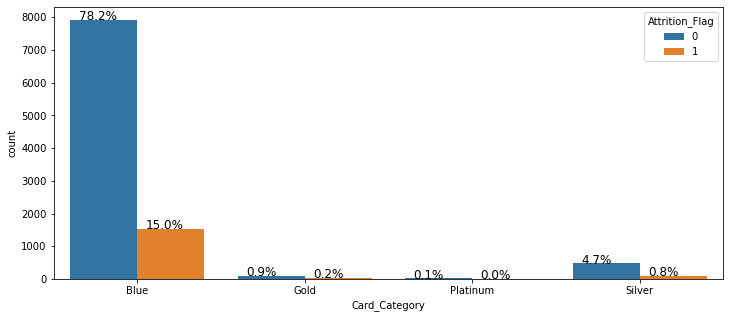

In [162]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Card_Category'], hue = data['Attrition_Flag'])
perc_on_bar(ax,data['Card_Category'])

- customers who are blue card holders are mostly in attrition zone

#### Attrition flag vs Marital_Status

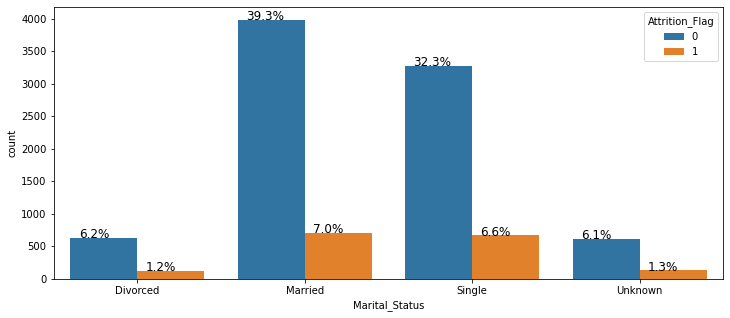

In [163]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Marital_Status'], hue = data['Attrition_Flag'])
perc_on_bar(ax,data['Marital_Status'])

- Married and single customers are likely more in attrition zone.

#### Attrition_flag vs Education_Level

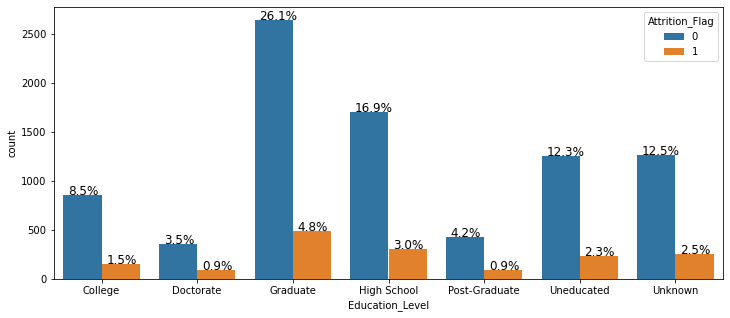

In [164]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Education_Level'], hue = data['Attrition_Flag'])
perc_on_bar(ax,data['Education_Level'])

- Graduate and Highschool customers are likely more in attrition zone

#### Attrition flag vs Dependent_count

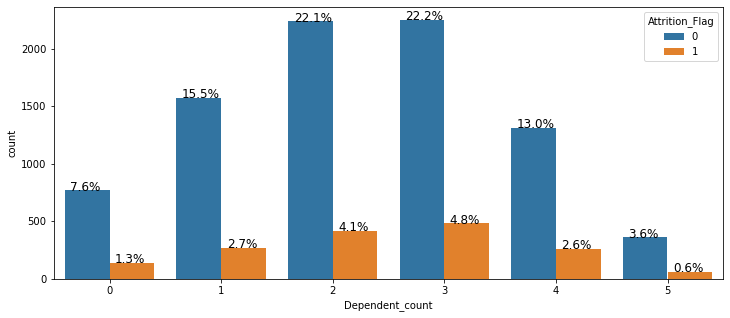

In [165]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Dependent_count'], hue = data['Attrition_Flag'])
perc_on_bar(ax,data['Dependent_count'])

- Customers with dependent conts 1 to 3 are likely more in attrition zone

#### Attrition flag vs Gender

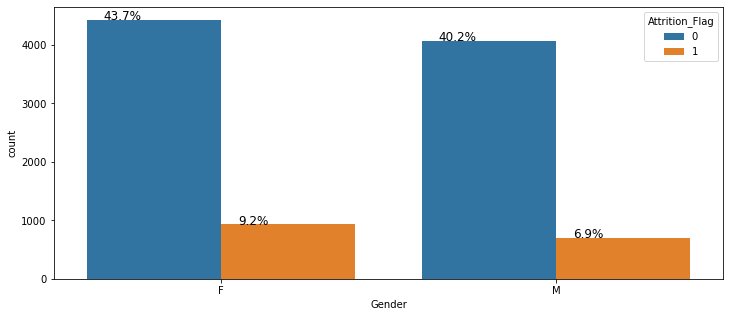

In [166]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data['Gender'], hue = data['Attrition_Flag'])
perc_on_bar(ax,data['Gender'])

- Seems like it does not have much impact on Attrition flag

## Data Preparation

In [52]:
# creating dictionary objects for mapping and inverse mapping
Gender={'F':1,'M':2}
Card_Category={'Blue':1,'Silver':2,'Gold':3,'Platinum':4}
Education_Level={'Uneducated': 1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
Marital_Status = {'Single':1,'Married':2,'Divorced':3}
Income_Category = {'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}

#### Mapping the category types to dictioanly objects

In [53]:
## for KNN imputer first we need to convert the category types to int and replace unknown with np.nan
#since education level has unknown, mapping them to Np.nan 
data['Education_Level']=data.Education_Level.map({'Unknown':np.NaN,'Uneducated': 1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6})

#since Marital_Status has unknown, mapping them to Np.nan 
data['Marital_Status']= data.Marital_Status.map({'Single':1,'Married':2,'Divorced':3,'Unknown':np.nan})

#since Income_Category has unknown, mapping them to Np.nan 
data['Income_Category']= data.Income_Category.map({'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5,'Unknown':np.nan})

#mapping Gender and and card category
data['Gender']=data.Gender.map(Gender).astype(int)
data['Card_Category']=data.Card_Category.map(Card_Category).astype(int)


#### Split the data into train and test sets

In [54]:
# Separating target variable and other variables
X = data.drop(columns="Attrition_Flag")
Y = data["Attrition_Flag"]

In [55]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


#### Missing value treatment using KNN Imputer in test and train sets

In [56]:
imputer = KNNImputer(n_neighbors=5)

In [57]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [58]:
# missing np.nan values replaced with float values hence rounding them to nearest values.
X_train['Income_Category'] = X_train['Income_Category'].apply(lambda x : round(x))
X_train['Marital_Status'] = X_train['Marital_Status'].apply(lambda x : round(x))
X_train['Education_Level'] = X_train['Education_Level'].apply(lambda x : round(x))

In [59]:
# missing np.nan values replaced with float values hence rounding them to nearest values.
X_test['Income_Category'] = X_test['Income_Category'].apply(lambda x : round(x))
X_test['Marital_Status'] = X_test['Marital_Status'].apply(lambda x : round(x))
X_test['Education_Level'] = X_test['Education_Level'].apply(lambda x : round(x))

In [60]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio     

- All the missing values are treated.

In [61]:
# inverse mapping
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')


In [62]:
inverse_mapping(Gender,'Gender')
inverse_mapping(Card_Category,'Card_Category')
inverse_mapping(Education_Level,'Education_Level')
inverse_mapping(Marital_Status,'Marital_Status')
inverse_mapping(Income_Category,'Income_Category')

In [63]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         2437
High School      1642
College          1290
Uneducated       1035
Post-Graduate     372
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3656
Single      2928
Divorced     504
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2630
$40K - $60K       1548
$80K - $120K      1202
$60K - $80K       1188
$120K +            520
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


In [64]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

F    3770
M    3318
Name: Gender, dtype: int64
******************************
Graduate         2437
High School      1642
College          1290
Uneducated       1035
Post-Graduate     372
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Married     3656
Single      2928
Divorced     504
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2630
$40K - $60K       1548
$80K - $120K      1202
$60K - $80K       1188
$120K +            520
Name: Income_Category, dtype: int64
******************************
Blue        6621
Silver       375
Gold          78
Platinum      14
Name: Card_Category, dtype: int64
******************************


#### Encoding all the categorical data

In [65]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 26) (3039, 26)


In [66]:
X_train.head()

Dependent_count  Months_on_book  Total_Relationship_Count  \
0              1.0            43.0                       6.0   
1              0.0            36.0                       3.0   
2              0.0            17.5                       6.0   
3              0.0            53.5                       3.0   
4              3.0            35.0                       6.0   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                     1.0                    2.0        7985.0   
1                     3.0                    2.0        5444.0   
2                     3.0                    4.0        1643.0   
3                     3.0                    0.0        2022.0   
4                     3.0                    4.0        4930.0   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
0                  0.0                 1.032            72.0   
1               2499.0                 0.468            80.0   
2               1101.0                 0.713            50.0   
3                  0.0                 0.579            65.0   
4                  0.0                 1.019            77.0   

   Total_Ct_Chng_Q4_Q1  ...  Education_Level_Uneducated  \
0                0.674  ...                           0   
1                0.667  ...                           0   
2                0.471  ...                           0   
3                0.548  ...                           0   
4                0.638  ...                           0   

   Marital_Status_Married  Marital_Status_Single  Income_Category_$40K - $60K  \
0                       1                      0                            1   
1                       0                      0                            0   
2                       0                      1                            1   
3                       0                      1                            0   
4                       0                      1                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            0                             0   
1                            1                             0   
2                            0                             0   
3                            0                             0   
4                            0                             1   

   Income_Category_Less than $40K  Card_Category_Gold  Card_Category_Platinum  \
0                               0                   0                       0   
1                               0                   0                       0   
2                               0                   0                       0   
3                               1                   0                       0   
4                               0                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 26 columns]

### Building the models

#### Model evaluation criterion / Metric

##### Model can predict wrong
- False Negatives(FN) - Model predicts that the customer is not Leaving but actually customer is leaving
- False Positives(FP) - Model Predicts that the cusomer is leaving but actially suctomer is not leaving.

##### which metric is important
- False Negatives(FN) is more important. So We should mostly focus on Recall score for model evaluation


#### common functions for Metrics

In [67]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model: classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [68]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model: classifier to predict values of X
    y_actual: ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##### Build Logistic regression Model

Logistic regression model score using Kfold CV 0.47498261071180153
Accuracy on training set :  0.8889672686230248
Accuracy on test set :  0.8812109246462653
Recall on training set :  0.4793678665496049
Recall on test set :  0.4344262295081967
Precision on training set :  0.7378378378378379
Precision on test set :  0.7138047138047138


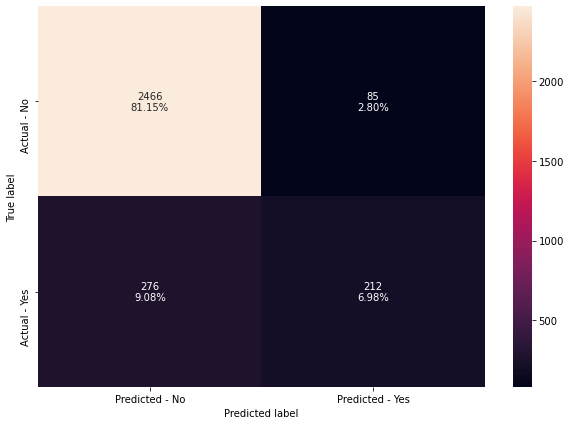

In [69]:
logistic_regression_model = LogisticRegression(random_state=1)
logistic_regression_model.fit(X_train, y_train)
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result = cross_val_score(
    estimator=logistic_regression_model, X=X_train, y=y_train, scoring=scoring, cv=kfold
)

print('Logistic regression model score using Kfold CV',cv_result.mean())


y_predict = logistic_regression_model.predict(X_test)

get_metrics_score(logistic_regression_model)

#Creating confusion matrix
make_confusion_matrix(logistic_regression_model,y_test)

##### 
- Recall on training and test sets are almost close but its very low.
- Lets try upsampling and down sampling to improve performance

#### Oversampling train data using SMOTE

In [70]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 26)
After UpSampling, the shape of train_y: (11898,) 



In [71]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

Logistic regression model score on over sampled data using Kfold CV 0.8445108169424204 

Accuracy on training set :  0.8314051918735892
Accuracy on test set :  0.8130964132938466
Recall on training set :  0.7357330992098332
Recall on test set :  0.6967213114754098
Precision on training set :  0.4838337182448037
Precision on test set :  0.4473684210526316


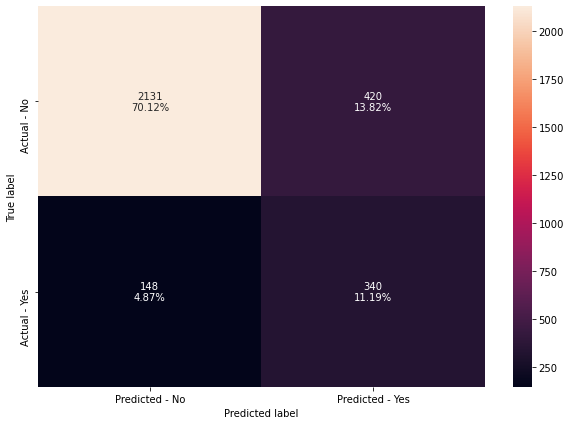

In [73]:
# logistic regression using Kfold CV
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
print('Logistic regression model score on over sampled data using Kfold CV',cv_result_over.mean(), '\n')

get_metrics_score(log_reg_over)

#Creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

#### 
- Recall Score incresed on Train & test sets.
- lets perform regularisation on oversampled set

#### Regularization

In [74]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.8119356659142212
Accuracy on test set :  0.8081605791378743
Recall on training set :  0.5908691834942933
Recall on test set :  0.5717213114754098
Precision on training set :  0.437012987012987
Precision on test set :  0.42725880551301687


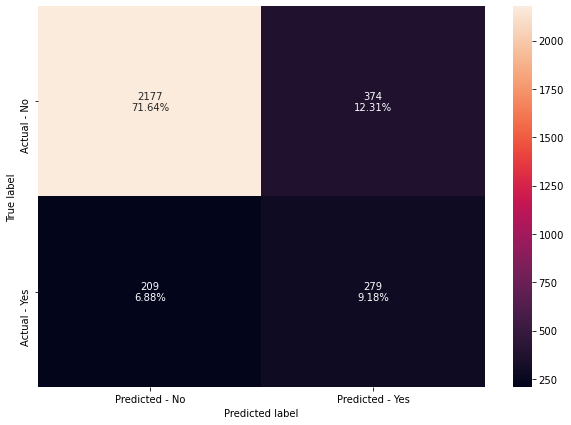

In [77]:
# calculating the metrics
get_metrics_score(lr_estimator)

#Creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

#### 
- after regularization recall score reduced to 59% on train and 57% on test
- lets do under sampling

#### Undersampling data using RandomUnderSampler

In [78]:
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [79]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 26)
After Under Sampling, the shape of train_y: (2278,) 



#### Logistic Regression on undersampled data

In [80]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

###### Evaluate the model by KFold and Crossvalidation

Logistic regression model score on under sampled data using Kfold CV 0.7927892418270346 

Accuracy on training set :  0.8167325056433409
Accuracy on test set :  0.8045409674234946
Recall on training set :  0.7866549604916594
Recall on test set :  0.7766393442622951
Precision on training set :  0.45901639344262296
Precision on test set :  0.4386574074074074


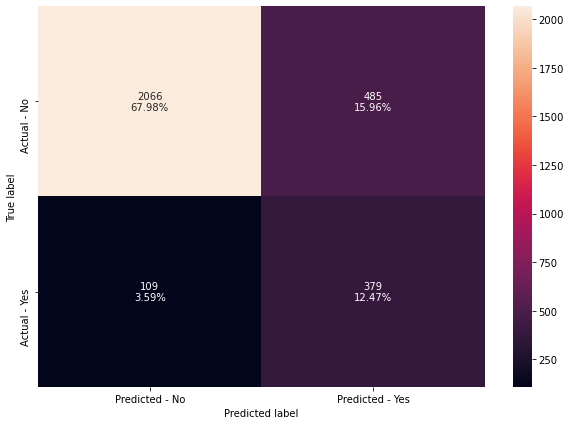

In [81]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)

print('Logistic regression model score on under sampled data using Kfold CV',cv_result_under.mean(), '\n')

# Calculating metrics
get_metrics_score(log_reg_under)

#Creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

#### 
- Model got recall score improved on undersampled data.

##### Compare the models created for logistic regression

In [83]:
# defining list of models
models = [logistic_regression_model,log_reg_over,lr_estimator,log_reg_under]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [89]:
comparison_frame_LR = pd.DataFrame({'Model':['Logistic regression',
                                          'Logistic regression over sampled',
                                          'Logistic regression Regularized',
                                          'Logistic regression Under Sampled'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame_LR.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
3  Logistic regression Under Sampled        0.816733       0.804541   
1   Logistic regression over sampled        0.831405       0.813096   
2    Logistic regression Regularized        0.811936       0.808161   
0                Logistic regression        0.888967       0.881211   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
3      0.786655     0.776639         0.459016        0.438657  
1      0.735733     0.696721         0.483834        0.447368  
2      0.590869     0.571721         0.437013        0.427259  
0      0.479368     0.434426         0.737838        0.713805

#### 
- Overall Logistic regression under sampled is doing better in Test recall

##### Build Models
* Decision tree 
* random forest 
* bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models

In [92]:
# building models using pipelines
bagging_boosting_models = []
bagging_boosting_models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
bagging_boosting_models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
bagging_boosting_models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
bagging_boosting_models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
bagging_boosting_models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in bagging_boosting_models:
    model.fit(X_train, y_train)
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 68.13007187572455
RF: 67.07821315403044
ADB: 69.88832212690316
GBM: 69.88600355514336
XGB: 73.74913053559007


#### 
- Looks like XGboosting is giving better recall score
- Best 3 out of 5 models are XGB,AdaBoost, Gradient Boosting 
- XGB,AdaBoost, Gradient Boost models will be considered further Hypertuninig with random search and Grid search

### Perform Hypertuning on XGB, ADA Boosting & Gradient Boosting Models using Gridsearch.

### Grid search

#### ADA boost - Grid search

In [94]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__n_estimators': 80} 
Score: 0.7427969703995672
CPU times: user 2.91 s, sys: 366 ms, total: 3.27 s
Wall time: 1min 14s


In [96]:
# Creating new pipeline with best parameters
abc_tuned_gridSearch = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=80,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned_gridSearch.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=80,
                                    random_state=1))])

Accuracy on training set :  0.9596501128668171
Accuracy on test set :  0.933201711089174
Recall on training set :  0.8235294117647058
Recall on test set :  0.7131147540983607
Precision on training set :  0.916911045943304
Precision on test set :  0.8467153284671532


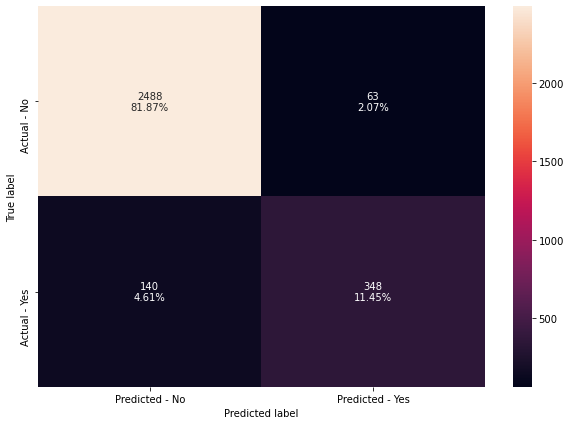

In [97]:
# Calculating different metrics
get_metrics_score(abc_tuned_gridSearch)

# Creating confusion matrix
make_confusion_matrix(abc_tuned_gridSearch, y_test)

#### 
- Recall has little improved on training and test

#### Gradient boost Grid search

In [108]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": np.arange(10, 110, 10),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1],
    "gradientboostingclassifier__max_depth": [1,2,3],
    "gradientboostingclassifier__init": [
        AdaBoostClassifier(random_state=1)
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__init': AdaBoostClassifier(random_state=1), 'gradientboostingclassifier__learning_rate': 1, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__n_estimators': 80, 'gradientboostingclassifier__subsample': 1} 
Score: 0.741919777417111
CPU times: user 24.4 s, sys: 3.23 s, total: 27.6 s
Wall time: 15min 21s


In [109]:
# Creating new pipeline with best parameters
gbm_tuned_gridSearch = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(init= AdaBoostClassifier(random_state=1), 
                               learning_rate=1,
                               max_depth=3,
                               max_features=0.8, 
                               n_estimators=80, 
                               random_state=1,
                               subsample=1, 
                                ),
)

# Fit the model on training data
gbm_tuned_gridSearch.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            learning_rate=1, max_features=0.8,
                                            n_estimators=80, random_state=1,
                                            subsample=1))])

Accuracy on training set :  0.9823645598194131
Accuracy on test set :  0.9259624876604146
Recall on training set :  0.926251097453907
Recall on test set :  0.7274590163934426
Precision on training set :  0.9625912408759124
Precision on test set :  0.7941834451901566


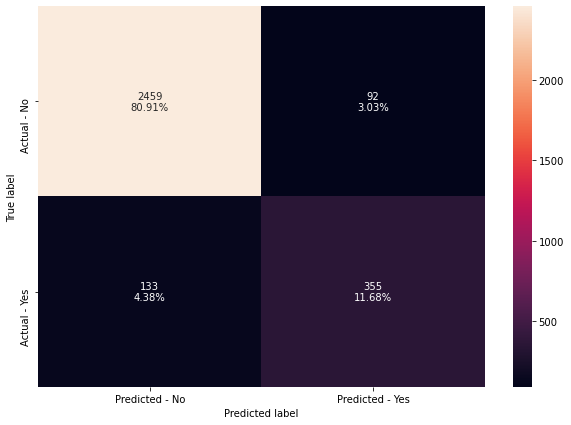

In [111]:
# Calculating different metrics
get_metrics_score(gbm_tuned_gridSearch)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned_gridSearch, y_test)

- Recall improved , its almost 92%. But on test set it is 72. Seems like little overfitting

#### XGBoost GridCV

In [112]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9087255583893654:
CPU times: user 23.5 s, sys: 2.75 s, total: 26.3 s
Wall time: 1h 13min 21s


In [114]:
# Creating new pipeline with best parameters
xgb_tuned_gridcv = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.7,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned_gridcv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.8596218961625283
Accuracy on test set :  0.8506087528792365
Recall on training set :  0.9604916593503073
Recall on test set :  0.8913934426229508
Precision on training set :  0.5352250489236791
Precision on test set :  0.5203349282296651


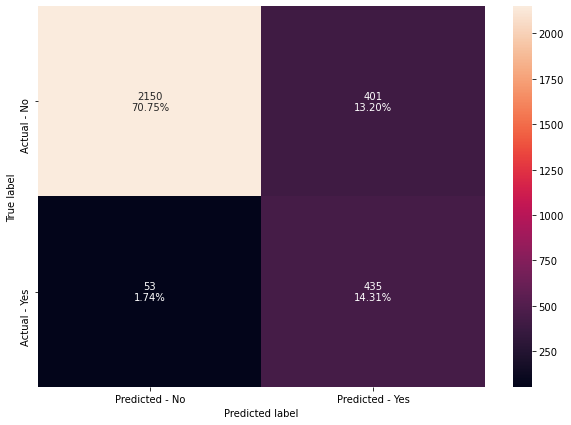

In [115]:
# Calculating different metrics
get_metrics_score(xgb_tuned_gridcv)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned_gridcv, y_test)

- XGB boost is giving better recall score on train and test sets than other models using Grid cv 

#### RandomSearch 

##### ADA boosing RandomSearch CV 

In [116]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
random_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(random_cv.best_params_,random_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7392881984697427:
CPU times: user 1min 56s, sys: 1.09 s, total: 1min 57s
Wall time: 1min 58s


In [118]:
# Creating new pipeline with best parameters
abc_tuned_randomCV = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=90,
        learning_rate=0.2,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned_randomCV.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.9621896162528216
Accuracy on test set :  0.930898321816387
Recall on training set :  0.8375768217734855
Recall on test set :  0.7090163934426229
Precision on training set :  0.9199614271938283
Precision on test set :  0.8357487922705314


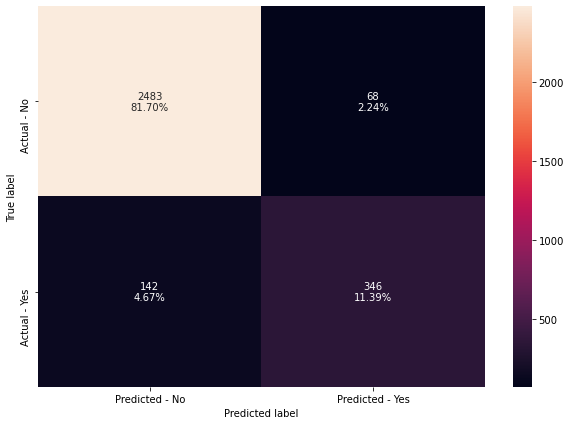

In [119]:
# Calculating different metrics
get_metrics_score(abc_tuned_randomCV)

# Creating confusion matrix
make_confusion_matrix(abc_tuned_randomCV, y_test)

- Execution Time
    - Random search cv took 1 min 58 sec
    - Grid search cv took 1 min 14 sec
- Recall score 
    more or less both grid cv and random search for ADA boost gave similar score.
 

#### Random search Gradient boosting

In [120]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": np.arange(10, 110, 10),
    "gradientboostingclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "gradientboostingclassifier__subsample":[0.8,0.9,1],
    "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1],
    "gradientboostingclassifier__max_depth": [1,2,3],
    "gradientboostingclassifier__init": [
        AdaBoostClassifier(random_state=1)
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
random_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(random_cv.best_params_,random_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.9, 'gradientboostingclassifier__n_estimators': 80, 'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__init': AdaBoostClassifier(random_state=1)} with CV score=0.7322551974650282:
CPU times: user 2min 9s, sys: 1.56 s, total: 2min 10s
Wall time: 2min 11s


In [121]:
# Creating new pipeline with best parameters
gbm_tuned_randomSearch = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(init= AdaBoostClassifier(random_state=1), 
                               learning_rate=0.2,
                               max_depth=3,
                               max_features=0.8, 
                               n_estimators=80, 
                               random_state=1,
                               subsample=0.9, 
                                ),
)

# Fit the model on training data
gbm_tuned_randomSearch.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            learning_rate=0.2, max_features=0.8,
                                            n_estimators=80, random_state=1,
                                            subsample=0.9))])

Accuracy on training set :  0.9524548532731377
Accuracy on test set :  0.9378084896347483
Recall on training set :  0.7910447761194029
Recall on test set :  0.7254098360655737
Precision on training set :  0.901
Precision on test set :  0.8655256723716381


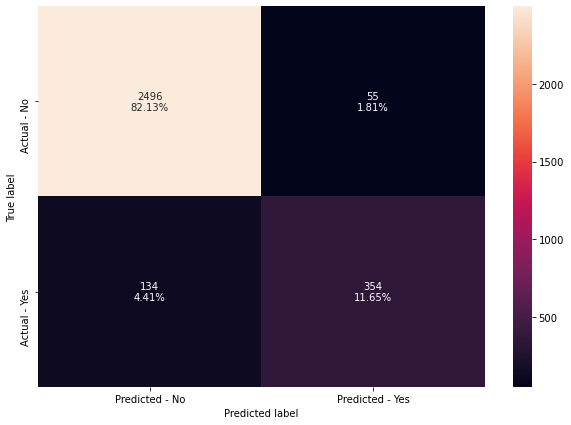

In [122]:
# Calculating different metrics
get_metrics_score(gbm_tuned_randomSearch)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned_randomSearch, y_test)

- Execution Time(its a good improvment in execution time)
    - Random search cv took just 2 min 11 sec
    - Grid search cv took almost 15 min
  
- Recall score 
    - Over all Random Search has better score compared to Grid Search. Model is better balanced.
 

#### randomSearch XGBoosting

In [123]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in RandomizedSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 1} with CV score=0.9306476543782363:
CPU times: user 12min 41s, sys: 12.5 s, total: 12min 53s
Wall time: 1min 45s


In [124]:
# Creating new pipeline with best parameters
xgb_tuned_random_search = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=250,
                scale_pos_weight=10,
                gamma=1,
                subsample=1,
                learning_rate= 0.05,
                eval_metric='logloss', 
                max_depth = 1, 
                reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned_random_search.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=1,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7768058690744921
Accuracy on test set :  0.767686739058901
Recall on training set :  0.9411764705882353
Recall on test set :  0.9282786885245902
Precision on training set :  0.41437959025898724
Precision on test set :  0.4030249110320285


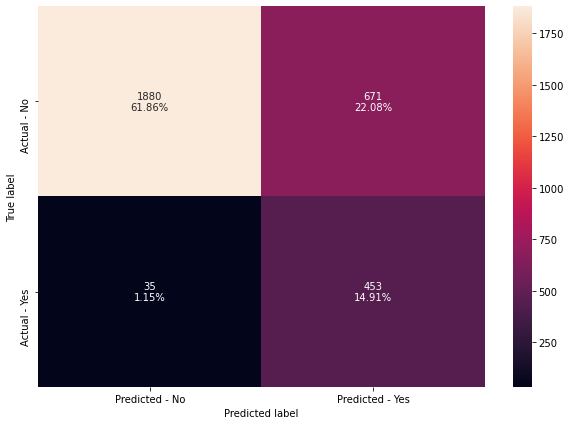

In [125]:
# Calculating different metrics
get_metrics_score(xgb_tuned_random_search)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned_random_search, y_test)

- Execution Time(There is a significant improvment in execution time)
    - Random search cv took just 1 min 45 sec
    - Grid search cv took more than 1 Hr
  
- Recall score 
    - Random Search xgboost has better score compared to Grid Search and best recall score compared to other models as well.

#### Comparing the model performances

In [126]:
# defining list of models
hypertuned_models = [abc_tuned_gridSearch,
          gbm_tuned_gridSearch,
          xgb_tuned_gridcv,
          abc_tuned_randomCV,
          gbm_tuned_randomSearch,
          xgb_tuned_random_search]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in hypertuned_models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [127]:
comparison_frame_hypertuned = pd.DataFrame({'Model':['abc_tuned_gridSearch',
                                                     'gbm_tuned_gridSearch',
                                                     'xgb_tuned_gridcv',
                                                     'abc_tuned_randomCV',
                                                     'gbm_tuned_randomSearch',
                                                     'xgb_tuned_random_search'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame_hypertuned.sort_values(by='Test_Recall',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
5  xgb_tuned_random_search        0.776806       0.767687      0.941176   
2         xgb_tuned_gridcv        0.859622       0.850609      0.960492   
1     gbm_tuned_gridSearch        0.982365       0.925962      0.926251   
4   gbm_tuned_randomSearch        0.952455       0.937808      0.791045   
0     abc_tuned_gridSearch        0.959650       0.933202      0.823529   
3       abc_tuned_randomCV        0.962190       0.930898      0.837577   

   Test_Recall  Train_Precision  Test_Precision  
5     0.928279         0.414380        0.403025  
2     0.891393         0.535225        0.520335  
1     0.727459         0.962591        0.794183  
4     0.725410         0.901000        0.865526  
0     0.713115         0.916911        0.846715  
3     0.709016         0.919961        0.835749

##### Over all if we compare all the metrics "gbm_tuned_randomSearch " model is better  and not overfitting or under fitting. Though the recall score is higher for "xgb_tuned_random_search" but other scores are less. Hence i am considering the model "gbm_tuned_randomSearch"

#### Feture importance (gbm_tuned_randomSearch)

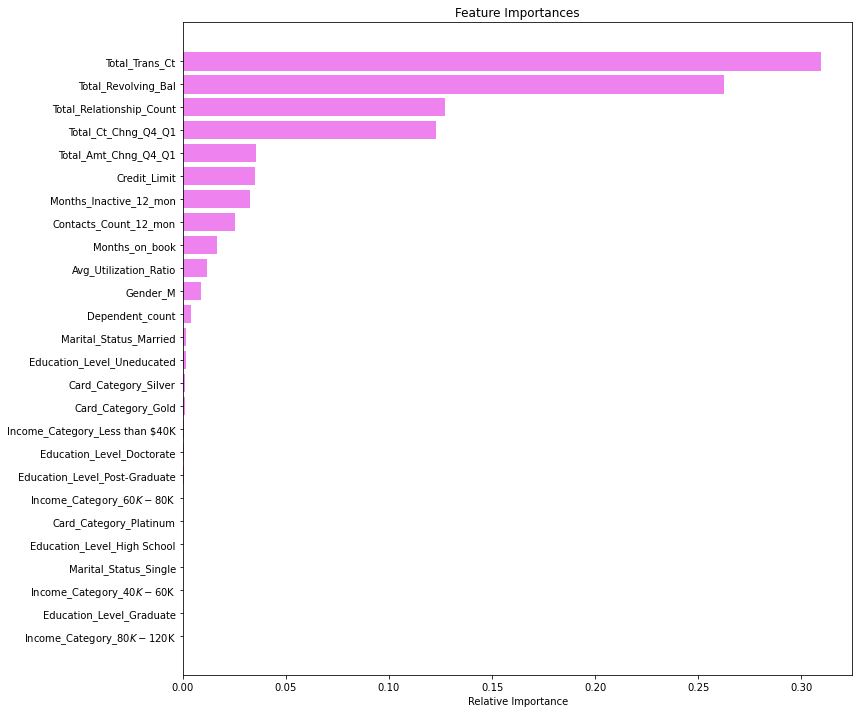

In [129]:
feature_names = X_train.columns
importances = gbm_tuned_randomSearch[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### From the above we can understand that Total_trans_ct & Total_Rovolving_Bal are  most important features which predicts the attrition_flag

### Conclusion

- From the above analysis we understand that following features are very important in predicting whether customer stays or leaves the bank.
    - Total_Trans_Ct
    - Total_Revolving_Bal
    - Total_Relationship_Count
    - Total_Ct_Chng_Q4_Q1
    - Total_Amt_Chng_Q4_Q1
    - Credit_Limit
    - Months_inactive_12_mon
    - Contacts_Count_12_mon
    - Months_on_book
    - Avg_utilization_ratio
- Bank should target customers who are likely to leave based on following criterian.
    - Customers who made more transactions
    - Customers who has more revolving balance
    - Customers who has more relationship count
    - Customers who has more transational counts/Amounts from Q4 to Q1
    - Customers who has more credit limit
    - Customers who are more inactive in the last 12 months
    - Customers who were contacted more in the last 12 minths
    - Customers who has longer relationships in terms of months.
    - Customers whose Avg utilization ratio is considerably good.
